In [1]:
import numpy as np
import pandas as pd

# Number of synthetic records
n_patients = 5000

# Define synthetic data generation based on the features from the datasets
np.random.seed(42)

# Demographic features
age = np.random.randint(20, 90, size=n_patients)  # age range 20 to 90
residence_location = np.random.choice([1, 2, 3], size=n_patients)  # 3 different residence locations
alcohol_intake = np.random.choice([0, 1], size=n_patients)  # 0 = No, 1 = Yes
smoking_status = np.random.choice([0, 1], size=n_patients)  # 0 = Non-smoker, 1 = Smoker
family_history = np.random.choice([0, 1], size=n_patients)  # 0 = No, 1 = Yes
b
# Medical history
number_of_children = np.random.randint(0, 6, size=n_patients)  # 0 to 5 children
age_at_menarche = np.random.randint(10, 18, size=n_patients)  # age range for menarche
menopausal_status = np.random.choice([0, 1], size=n_patients)  # 0 = Pre, 1 = Post
hormone_therapy_use = np.random.choice([0, 1], size=n_patients)  # 0 = No, 1 = Yes
oral_contraceptive_use = np.random.choice([0, 1], size=n_patients)  # 0 = No, 1 = Yes

# Breast condition
tumor_size = np.random.randint(1, 100, size=n_patients)  # size in mm
lymph_node_status = np.random.choice([0, 1], size=n_patients)  # 0 = Negative, 1 = Positive
breast_pain = np.random.choice([0, 1], size=n_patients)  # 0 = No, 1 = Yes
breast_lump = np.random.choice([0, 1], size=n_patients)  # 0 = No, 1 = Yes
biopsy = np.random.choice([0, 1], size=n_patients)  # 0 = No, 1 = Yes

# Genetic and receptor status
genetic_mutation = np.random.choice(['BRCA1', 'BRCA2', 'Others'], size=n_patients)
hormone_receptor_status = np.random.choice([0, 1], size=n_patients)  # 0 = Negative, 1 = Positive

# Diagnosis status (Benign or Malignant)
def determine_diagnosis(age, family_history, menopausal_status, tumor_size, breast_lump, biopsy, genetic_mutation, hormone_therapy_use):
    risk_factors = 0
    
    if age > 50:
        risk_factors += 1
    if family_history == 1:
        risk_factors += 1
    if menopausal_status == 1:
        risk_factors += 1
    if tumor_size > 20:
        risk_factors += 1
    if breast_lump == 1:
        risk_factors += 1
    if biopsy == 1:
        risk_factors += 1
    if genetic_mutation in ['BRCA1', 'BRCA2']:
        risk_factors += 1
    if hormone_therapy_use == 1:
        risk_factors += 1
    
    if risk_factors >= 3:
        return 'Malignant'
    else:
        return 'Benign'

# Apply the diagnosis function
diagnosis_status = np.array([determine_diagnosis(age[i], family_history[i], menopausal_status[i], tumor_size[i], breast_lump[i], biopsy[i], genetic_mutation[i], hormone_therapy_use[i]) 
                             for i in range(n_patients)])

# Metastasis status (0 for M0, 1 for M1)
metastasis_status = np.random.choice([0, 1], size=n_patients, p=[0.9, 0.1])  # Assume 10% of patients have metastasis

# Define cancer stages based on TNM and metastasis (for Malignant cases only)
def assign_stage(tumor_size, lymph_node_status, metastasis_status, diagnosis_status):
    if diagnosis_status == 'Benign':
        return 'NA'
    
    if tumor_size <= 20:
        T_stage = 'T1'
    elif 20 < tumor_size <= 50:
        T_stage = 'T2'
    else:
        T_stage = 'T3'
    
    if lymph_node_status == 0:
        N_stage = 'N0'
    else:
        N_stage = 'N1'
    
    if metastasis_status == 0:
        M_stage = 'M0'
    else:
        M_stage = 'M1'
    
    if M_stage == 'M1':
        return 'Stage IV'
    elif T_stage == 'T1' and N_stage == 'N0':
        return 'Stage I'
    elif T_stage == 'T2' or N_stage == 'N1':
        return 'Stage II'
    else:
        return 'Stage III'

# Apply the function to generate cancer stages
cancer_stage = np.array([assign_stage(tumor_size[i], lymph_node_status[i], metastasis_status[i], diagnosis_status[i]) 
                         for i in range(n_patients)])

# Treatment based on cancer stage, hormone receptor status, menopausal history, genetic mutation, and diagnosis status
def determine_treatment(cancer_stage, hormone_receptor_status, menopausal_status, genetic_mutation, diagnosis_status):
    if diagnosis_status == 'Benign':
        return 'Regular Monitoring or Minor Surgery'
    
    if cancer_stage == 'Stage I' or cancer_stage == 'Stage II':
        if hormone_receptor_status == 1 and menopausal_status == 1:
            return 'Surgery + Hormone Therapy (Aromatase Inhibitors)'
        elif hormone_receptor_status == 1:
            return 'Surgery + Hormone Therapy (Tamoxifen)'
        else:
            return 'Surgery + Radiation'
    
    if cancer_stage == 'Stage III':
        if hormone_receptor_status == 1:
            return 'Chemotherapy + Hormone Therapy'
        else:
            return 'Chemotherapy + Surgery'
    
    if cancer_stage == 'Stage IV':
        if genetic_mutation in ['BRCA1', 'BRCA2']:
            return 'PARP Inhibitors + Chemotherapy'
        else:
            return 'Chemotherapy + Targeted Therapy'

# Apply the function to generate treatments
treatment = np.array([determine_treatment(cancer_stage[i], hormone_receptor_status[i], menopausal_status[i], genetic_mutation[i], diagnosis_status[i]) 
                      for i in range(n_patients)])

# Combine into a DataFrame
synthetic_data = pd.DataFrame({
    'Age': age,
    'Residence_Location': residence_location,
    'Alcohol_Intake': alcohol_intake,
    'Smoking_Status': smoking_status,
    'Family_History_of_Breast_Cancer': family_history,
    'Number_of_Children': number_of_children,
    'Age_at_Menarche': age_at_menarche,
    'Menopausal_Status': menopausal_status,
    'Hormone_Replacement_Therapy_Use': hormone_therapy_use,
    'Oral_Contraceptive_Use': oral_contraceptive_use,
    'Tumor_Size_mm': tumor_size,
    'Lymph_Node_Status': lymph_node_status,
    'Breast_Pain': breast_pain,
    'Breast_Lump': breast_lump,
    'Breast_Biopsy': biopsy,
    'Genetic_Mutation': genetic_mutation,
    'Hormone_Receptor_Status': hormone_receptor_status,
    'Diagnosis_Status': diagnosis_status,
    'Metastasis_Status': metastasis_status,
    'Cancer_Stage': cancer_stage,
    'Treatment': treatment,
    'Survival_Status': np.random.choice(['Alive', 'Deceased'], size=n_patients),
    'Follow_Up_Duration_months': np.random.randint(1, 120, size=n_patients)  # Follow-up in months
})

# Save to CSV
output_file = 'breast_cancer_data___.csv'
synthetic_data.to_csv(output_file, index=False)

output_file


'breast_cancer_data___.csv'

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('breast_cancer_data___.csv')
dataset.head()

Age  Residence_Location  Alcohol_Intake  Smoking_Status  \
0   71                   2               1               0   
1   34                   1               1               0   
2   80                   1               0               0   
3   40                   1               0               1   
4   43                   3               1               1   

   Family_History_of_Breast_Cancer  Number_of_Children  Age_at_Menarche  \
0                                0                   1               10   
1                                1                   1               17   
2                                0                   1               17   
3                                1                   4               16   
4                                0                   0               15   

   Menopausal_Status  Hormone_Replacement_Therapy_Use  Oral_Contraceptive_Use  \
0                  0                                1                       0   
1                  1                                0                       0   
2                  1                                1                       1   
3                  0                                1                       0   
4                  1                                0                       0   

   ...  Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0  ...            0              0             BRCA2                        0   
1  ...            1              0             BRCA2                        0   
2  ...            0              0             BRCA1                        1   
3  ...            1              0            Others                        1   
4  ...            1              1             BRCA2                        1   

   Diagnosis_Status Metastasis_Status  Cancer_Stage  \
0         Malignant                 0      Stage II   
1         Malignant                 0      Stage II   
2         Malignant                 0     Stage III   
3         Malignant                 0     Stage III   
4         Malignant                 1      Stage IV   

                        Treatment  Survival_Status Follow_Up_Duration_months  
0             Surgery + Radiation         Deceased                        40  
1             Surgery + Radiation         Deceased                        74  
2  Chemotherapy + Hormone Therapy            Alive                        34  
3  Chemotherapy + Hormone Therapy         Deceased                        84  
4  PARP Inhibitors + Chemotherapy            Alive                       111  

[5 rows x 23 columns]

In [3]:
dataset.Treatment.unique()

array(['Surgery + Radiation', 'Chemotherapy + Hormone Therapy',
       'PARP Inhibitors + Chemotherapy',
       'Surgery + Hormone Therapy (Tamoxifen)', 'Chemotherapy + Surgery',
       'Chemotherapy + Targeted Therapy',
       'Surgery + Hormone Therapy (Aromatase Inhibitors)',
       'Regular Monitoring or Minor Surgery'], dtype=object)

In [5]:
dataset.Cancer_Stage.unique()

array(['Stage II', 'Stage III', 'Stage IV', 'Stage I', nan], dtype=object)

In [6]:
dataset.Diagnosis_Status.unique()

array(['Malignant', 'Benign'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Hormone_Receptor_Status" column
dataset['Genetic_Mutation'] = label_encoder.fit_transform(dataset['Genetic_Mutation'])

# Display the encoded values
print(dataset['Genetic_Mutation'].value_counts())


Genetic_Mutation
0    1675
1    1674
2    1651
Name: count, dtype: int64


In [8]:
# Encode categorical variables
categorical_columns = ['Diagnosis_Status', 'Treatment', 'Survival_Status', 'Cancer_Stage']

# Initialize Label Encoder
label_encoders = {}

for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    dataset[column] = label_encoders[column].fit_transform(dataset[column].astype(str))


In [9]:
data = dataset.drop(['Survival_Status', 'Follow_Up_Duration_months'], axis = 1)
data.head()

Age  Residence_Location  Alcohol_Intake  Smoking_Status  \
0   71                   2               1               0   
1   34                   1               1               0   
2   80                   1               0               0   
3   40                   1               0               1   
4   43                   3               1               1   

   Family_History_of_Breast_Cancer  Number_of_Children  Age_at_Menarche  \
0                                0                   1               10   
1                                1                   1               17   
2                                0                   1               17   
3                                1                   4               16   
4                                0                   0               15   

   Menopausal_Status  Hormone_Replacement_Therapy_Use  Oral_Contraceptive_Use  \
0                  0                                1                       0   
1                  1                                0                       0   
2                  1                                1                       1   
3                  0                                1                       0   
4                  1                                0                       0   

   ...  Lymph_Node_Status  Breast_Pain  Breast_Lump  Breast_Biopsy  \
0  ...                  1            1            0              0   
1  ...                  1            0            1              0   
2  ...                  0            0            0              0   
3  ...                  0            0            1              0   
4  ...                  1            0            1              1   

   Genetic_Mutation  Hormone_Receptor_Status  Diagnosis_Status  \
0                 1                        0                 1   
1                 1                        0                 1   
2                 0                        1                 1   
3                 2                        1                 1   
4                 1                        1                 1   

   Metastasis_Status  Cancer_Stage  Treatment  
0                  0             1          7  
1                  0             1          7  
2                  0             2          0  
3                  0             2          0  
4                  1             3          3  

[5 rows x 21 columns]

In [10]:
data.columns

Index(['Age', 'Residence_Location', 'Alcohol_Intake', 'Smoking_Status',
       'Family_History_of_Breast_Cancer', 'Number_of_Children',
       'Age_at_Menarche', 'Menopausal_Status',
       'Hormone_Replacement_Therapy_Use', 'Oral_Contraceptive_Use',
       'Tumor_Size_mm', 'Lymph_Node_Status', 'Breast_Pain', 'Breast_Lump',
       'Breast_Biopsy', 'Genetic_Mutation', 'Hormone_Receptor_Status',
       'Diagnosis_Status', 'Metastasis_Status', 'Cancer_Stage', 'Treatment'],
      dtype='object')

In [11]:
# Save to CSV
output_file = 'breast_cancer_numeric_data___.csv'
data.to_csv(output_file, index=False)

output_file

'breast_cancer_numeric_data___.csv'

In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv('breast_cancer_numeric_data___.csv')
data.head()

Age  Residence_Location  Alcohol_Intake  Smoking_Status  \
0   71                   2               1               0   
1   34                   1               1               0   
2   80                   1               0               0   
3   40                   1               0               1   
4   43                   3               1               1   

   Family_History_of_Breast_Cancer  Number_of_Children  Age_at_Menarche  \
0                                0                   1               10   
1                                1                   1               17   
2                                0                   1               17   
3                                1                   4               16   
4                                0                   0               15   

   Menopausal_Status  Hormone_Replacement_Therapy_Use  Oral_Contraceptive_Use  \
0                  0                                1                       0   
1                  1                                0                       0   
2                  1                                1                       1   
3                  0                                1                       0   
4                  1                                0                       0   

   ...  Lymph_Node_Status  Breast_Pain  Breast_Lump  Breast_Biopsy  \
0  ...                  1            1            0              0   
1  ...                  1            0            1              0   
2  ...                  0            0            0              0   
3  ...                  0            0            1              0   
4  ...                  1            0            1              1   

   Genetic_Mutation  Hormone_Receptor_Status  Diagnosis_Status  \
0                 1                        0                 1   
1                 1                        0                 1   
2                 0                        1                 1   
3                 2                        1                 1   
4                 1                        1                 1   

   Metastasis_Status  Cancer_Stage  Treatment  
0                  0             1          7  
1                  0             1          7  
2                  0             2          0  
3                  0             2          0  
4                  1             3          3  

[5 rows x 21 columns]

In [19]:
dataset = pd.read_csv('breast_cancer_data___.csv')
dataset.head()

Age  Residence_Location  Alcohol_Intake  Smoking_Status  \
0   71                   2               1               0   
1   34                   1               1               0   
2   80                   1               0               0   
3   40                   1               0               1   
4   43                   3               1               1   

   Family_History_of_Breast_Cancer  Number_of_Children  Age_at_Menarche  \
0                                0                   1               10   
1                                1                   1               17   
2                                0                   1               17   
3                                1                   4               16   
4                                0                   0               15   

   Menopausal_Status  Hormone_Replacement_Therapy_Use  Oral_Contraceptive_Use  \
0                  0                                1                       0   
1                  1                                0                       0   
2                  1                                1                       1   
3                  0                                1                       0   
4                  1                                0                       0   

   ...  Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0  ...            0              0             BRCA2                        0   
1  ...            1              0             BRCA2                        0   
2  ...            0              0             BRCA1                        1   
3  ...            1              0            Others                        1   
4  ...            1              1             BRCA2                        1   

   Diagnosis_Status Metastasis_Status  Cancer_Stage  \
0         Malignant                 0      Stage II   
1         Malignant                 0      Stage II   
2         Malignant                 0     Stage III   
3         Malignant                 0     Stage III   
4         Malignant                 1      Stage IV   

                        Treatment  Survival_Status Follow_Up_Duration_months  
0             Surgery + Radiation         Deceased                        40  
1             Surgery + Radiation         Deceased                        74  
2  Chemotherapy + Hormone Therapy            Alive                        34  
3  Chemotherapy + Hormone Therapy         Deceased                        84  
4  PARP Inhibitors + Chemotherapy            Alive                       111  

[5 rows x 23 columns]

In [14]:
data.Treatment.unique()

array([7, 0, 3, 6, 1, 2, 5, 4], dtype=int64)

In [20]:
dataset.Treatment.unique()

array(['Surgery + Radiation', 'Chemotherapy + Hormone Therapy',
       'PARP Inhibitors + Chemotherapy',
       'Surgery + Hormone Therapy (Tamoxifen)', 'Chemotherapy + Surgery',
       'Chemotherapy + Targeted Therapy',
       'Surgery + Hormone Therapy (Aromatase Inhibitors)',
       'Regular Monitoring or Minor Surgery'], dtype=object)

In [21]:
dataset.Cancer_Stage.unique()

array(['Stage II', 'Stage III', 'Stage IV', 'Stage I', nan], dtype=object)

In [23]:
data['Cancer_Stage'] = data['Cancer_Stage'].replace({0: 1, 1: 2, 2: 3, 3: 4, 4: 0})
data.head()

Age  Residence_Location  Alcohol_Intake  Smoking_Status  \
0   71                   2               1               0   
1   34                   1               1               0   
2   80                   1               0               0   
3   40                   1               0               1   
4   43                   3               1               1   

   Family_History_of_Breast_Cancer  Number_of_Children  Age_at_Menarche  \
0                                0                   1               10   
1                                1                   1               17   
2                                0                   1               17   
3                                1                   4               16   
4                                0                   0               15   

   Menopausal_Status  Hormone_Replacement_Therapy_Use  Oral_Contraceptive_Use  \
0                  0                                1                       0   
1                  1                                0                       0   
2                  1                                1                       1   
3                  0                                1                       0   
4                  1                                0                       0   

   ...  Lymph_Node_Status  Breast_Pain  Breast_Lump  Breast_Biopsy  \
0  ...                  1            1            0              0   
1  ...                  1            0            1              0   
2  ...                  0            0            0              0   
3  ...                  0            0            1              0   
4  ...                  1            0            1              1   

   Genetic_Mutation  Hormone_Receptor_Status  Diagnosis_Status  \
0                 1                        0                 1   
1                 1                        0                 1   
2                 0                        1                 1   
3                 2                        1                 1   
4                 1                        1                 1   

   Metastasis_Status  Cancer_Stage  Treatment  
0                  0             2          7  
1                  0             2          7  
2                  0             3          0  
3                  0             3          0  
4                  1             4          3  

[5 rows x 21 columns]

In [24]:
data.Cancer_Stage.unique() 

array([2, 3, 4, 1, 0], dtype=int64)

In [4]:
dataset.Genetic_Mutation.unique()

array(['BRCA2', 'BRCA1', 'Others'], dtype=object)

In [25]:
data.Genetic_Mutation.unique()

array([1, 0, 2], dtype=int64)

In [26]:
dataset.Diagnosis_Status.unique()

array(['Malignant', 'Benign'], dtype=object)

In [27]:
data.Diagnosis_Status.unique()

array([1, 0], dtype=int64)

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('breast_cancer_numeric_data___.csv')
data.head()

Age  Residence_Location  Alcohol_Intake  Smoking_Status  \
0   71                   2               1               0   
1   34                   1               1               0   
2   80                   1               0               0   
3   40                   1               0               1   
4   43                   3               1               1   

   Family_History_of_Breast_Cancer  Number_of_Children  Age_at_Menarche  \
0                                0                   1               10   
1                                1                   1               17   
2                                0                   1               17   
3                                1                   4               16   
4                                0                   0               15   

   Menopausal_Status  Hormone_Replacement_Therapy_Use  Oral_Contraceptive_Use  \
0                  0                                1                       0   
1                  1                                0                       0   
2                  1                                1                       1   
3                  0                                1                       0   
4                  1                                0                       0   

   ...  Lymph_Node_Status  Breast_Pain  Breast_Lump  Breast_Biopsy  \
0  ...                  1            1            0              0   
1  ...                  1            0            1              0   
2  ...                  0            0            0              0   
3  ...                  0            0            1              0   
4  ...                  1            0            1              1   

   Genetic_Mutation  Hormone_Receptor_Status  Diagnosis_Status  \
0                 1                        0                 1   
1                 1                        0                 1   
2                 0                        1                 1   
3                 2                        1                 1   
4                 1                        1                 1   

   Metastasis_Status  Cancer_Stage  Treatment  
0                  0             1          7  
1                  0             1          7  
2                  0             2          0  
3                  0             2          0  
4                  1             3          3  

[5 rows x 21 columns]

In [4]:
data['Diagnosis_Status'].value_counts()

Diagnosis_Status
1    4630
0     370
Name: count, dtype: int64

In [5]:
data['Lymph_Node_Status'].value_counts()

Lymph_Node_Status
1    2566
0    2434
Name: count, dtype: int64

In [6]:
data['Metastasis_Status'].value_counts()

Metastasis_Status
0    4496
1     504
Name: count, dtype: int64

In [2]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Correlation with the target variable
target_variable = 'Diagnosis_Status'  # Replace with your actual target column name
correlation_with_target = correlation_matrix[target_variable]

# Display the correlations with the target variable
print(correlation_with_target)


                                      Age  Residence_Location  Alcohol_Intake  \
Age                              1.000000           -0.006034        0.005622   
Residence_Location              -0.006034            1.000000       -0.005254   
Alcohol_Intake                   0.005622           -0.005254        1.000000   
Smoking_Status                  -0.012631            0.008406       -0.021213   
Family_History_of_Breast_Cancer  0.010312           -0.004733       -0.020450   
Number_of_Children               0.042989            0.012974       -0.033371   
Age_at_Menarche                  0.000055            0.016515        0.038365   
Menopausal_Status               -0.013163            0.005604       -0.000590   
Hormone_Replacement_Therapy_Use  0.003268            0.003548       -0.005498   
Oral_Contraceptive_Use          -0.020383            0.013900        0.003964   
Tumor_Size_mm                   -0.014593           -0.009212        0.021906   
Lymph_Node_Status           

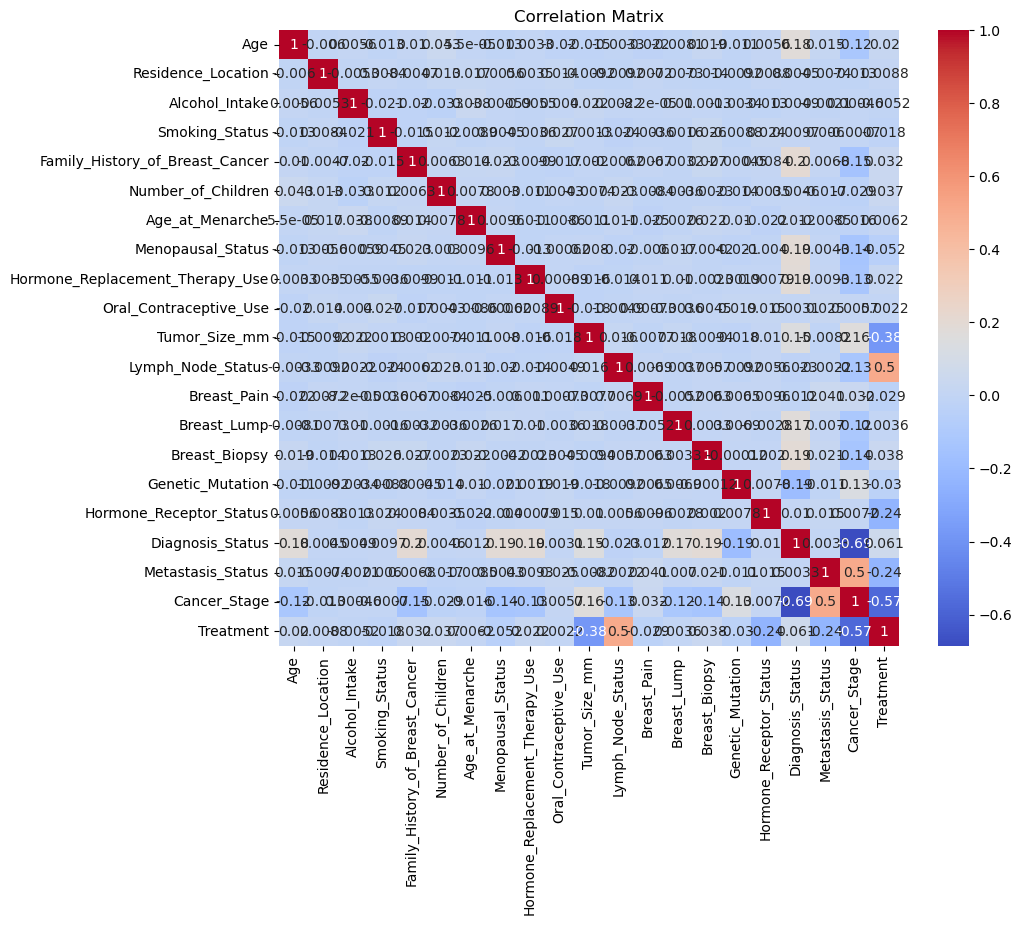

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [10]:
data = data.drop(['Residence_Location', 'Hormone_Replacement_Therapy_Use', 'Oral_Contraceptive_Use', 'Number_of_Children',
       'Age_at_Menarche'], axis = 1)
data.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  
0                 1                  0             1          7  
1                 1                  0             1          7  
2                 1                  0             2          0  
3                 1                  0             2          0  
4                 1                  1             3          3

In [33]:
data.Diagnosis_Status.value_counts()

Diagnosis_Status
1    4630
0     370
Name: count, dtype: int64

In [34]:
data.Cancer_Stage.value_counts()

Cancer_Stage
1    2752
2    1062
3     468
4     370
0     348
Name: count, dtype: int64

In [35]:
data.Cancer_Stage.unique() 

array([1, 2, 3, 0, 4], dtype=int64)

In [36]:
dataset.Cancer_Stage.unique()

array(['Stage II', 'Stage III', 'Stage IV', 'Stage I', nan], dtype=object)

In [11]:
data['Cancer_Stage'] = data['Cancer_Stage'].replace({0: 1, 1: 2, 2: 3, 3: 4, 4: 0})
data.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  
0                 1                  0             2          7  
1                 1                  0             2          7  
2                 1                  0             3          0  
3                 1                  0             3          0  
4                 1                  1             4          3

In [12]:
# Save to CSV
output_file = 'Modified_breast_cancer_numeric_data___.csv'
data.to_csv(output_file, index=False)

output_file

'Modified_breast_cancer_numeric_data___.csv'

In [13]:
data.Cancer_Stage.value_counts()

Cancer_Stage
2    2752
3    1062
4     468
0     370
1     348
Name: count, dtype: int64

In [14]:
data.Treatment.value_counts()

Treatment
7    1567
5     775
6     758
0     538
1     524
4     370
3     322
2     146
Name: count, dtype: int64

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Cross Validation Score: 0.9813


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.98021583 0.98201439 0.97482014 0.97482014 0.98201439 0.97302158
 0.98378378 0.97657658 0.98558559 0.98918919]
Average CV Score: 0.9802041609955279
Standard Deviation of CV Scores: 0.01
Validation Accuracy with Best Model: 0.9762419006479481
Test Accuracy with Best Model: 0.9854211663066955

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       919
           1       1.00      0.97      0.99       933

    accuracy                           0.99      1852
   macro avg       0.99      0.99      0.99      1852
weighted avg       0.99      0.99      0.99      1852

Confusion Matrix:
[[919   0]
 [ 27 906]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9711


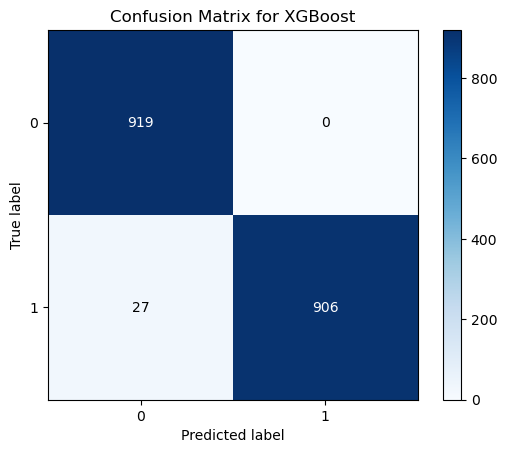

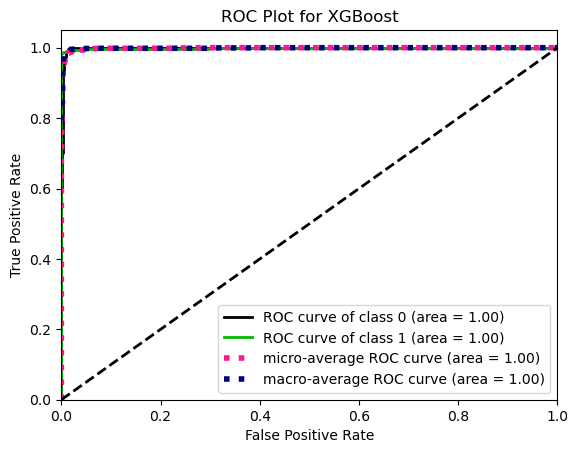

In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Import the dataset
data

# Independent (X) and dependent (y) variables
X = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Initialize the XGBoost classifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],          # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],         # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],          # Minimum loss reduction required to make a further partition
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")

# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores: {:.2f}".format(cv_scores.std()))

# Make predictions on validation set
y_pred_val = best_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print classification report and confusion matrix
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()



|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9754    | 13.23     | 0.8576    | 2.808     | 6.359     | 269.5     |
| 2         | 0.9735    | 14.69     | 0.7188    | 3.675     | 9.709     | 253.4     |
| 3         | 0.9757    | 11.11     | 0.5738    | 1.599     | 3.971     | 233.8     |
| 4         | 0.9766    | 19.59     | 0.9952    | 2.908     | 3.225     | 226.1     |
| 5         | 0.9754    | 18.82     | 0.6488    | 2.846     | 3.019     | 227.0     |
| 6         | 0.9766    | 20.0      | 1.0       | 2.95      | 3.363     | 225.5     |
| 7         | 0.9742    | 18.79     | 0.8124    | 3.949     | 4.679     | 224.9     |
| 8         | 0.9766    | 20.0      | 1.0       | 2.085     | 2.29      | 225.6     |
| 9         | 0.9808    | 20.0      | 1.0       | 1.107     | 3.874     | 226.0     |
| 10        | 0.9803    | 20.0      | 1.0       | 1.0 

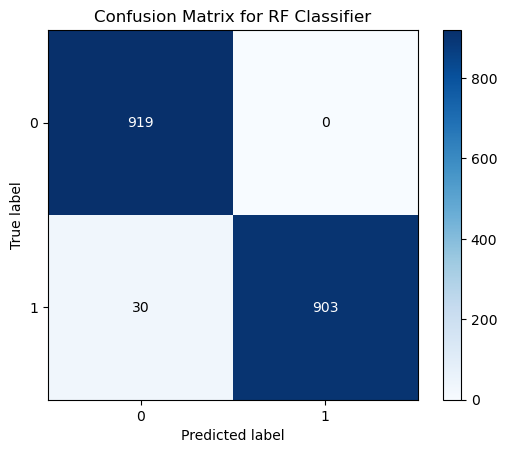

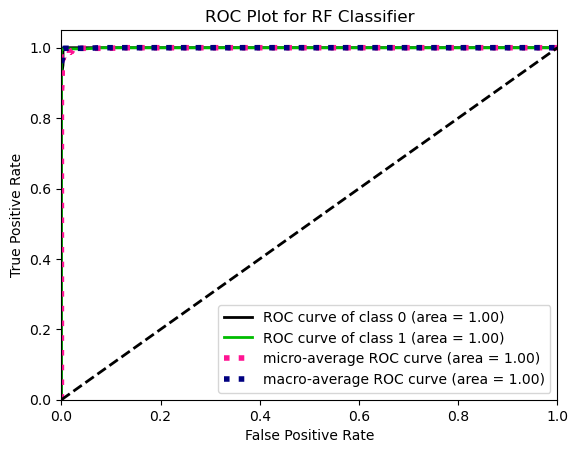

AUC: 1.00

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              1              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             0.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [41]:
# Random Forest Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt  # Make sure scikit-plot is installed
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

# Importing the dataset
data

# Assuming X contains your independent variables and y contains your dependent variable
X = data.iloc[:, 0:12].values
y = data.iloc[:, 12].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features,
        random_state=0
    )
    
    # Perform cross-validation (CV) on the training set
    cv_scores = cross_val_score(rf_classifier, X_trainval, y_trainval, scoring='accuracy', cv=5)
    
    # We minimize the negative cross-validation score because Bayesian Optimization minimizes functions
    return cv_scores.mean()

# Define the parameter bounds for the optimization process
param_bounds = {
    'n_estimators': (100, 500),           # Range for number of trees
    'max_depth': (5, 20),                 # Range for max depth
    'min_samples_split': (2, 10),         # Range for min samples split
    'min_samples_leaf': (1, 4),           # Range for min samples leaf
    'max_features': (0.5, 1.0)            # Fraction of features to consider at each split (between 50% and 100%)
}

# Set up the Bayesian Optimization instance
optimizer = BayesianOptimization(
    f=rf_cv,  # The function to optimize
    pbounds=param_bounds,  # The hyperparameter search space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbosity mode
)

# Run the optimization process
optimizer.maximize(
    init_points=2,  # Number of random steps before optimization
    n_iter=10  # Number of iterations of the optimization
)

# Print the best result found by Bayesian Optimization
print("Best Parameters Found by Bayesian Optimization:")
print(optimizer.max)

# Train the Random Forest with the best parameters found
best_params = optimizer.max['params']
best_rf_classifier = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0
)

best_rf_classifier.fit(X_trainval, y_trainval)

# Evaluate the model on validation set
y_pred_val = best_rf_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate and print the AUC score
from sklearn.metrics import roc_auc_score
auc_value = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC: {auc_value:.2f}")

# Extract results into a DataFrame
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


# Modification of Data

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Modified_breast_cancer_numeric_data___.csv')
dataset.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  
0                 1                  0             2          7  
1                 1                  0             2          7  
2                 1                  0             3          0  
3                 1                  0             3          0  
4                 1                  1             4          3

In [2]:
dataset.columns

Index(['Age', 'Alcohol_Intake', 'Smoking_Status',
       'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Tumor_Size_mm',
       'Lymph_Node_Status', 'Breast_Pain', 'Breast_Lump', 'Breast_Biopsy',
       'Genetic_Mutation', 'Hormone_Receptor_Status', 'Diagnosis_Status',
       'Metastasis_Status', 'Cancer_Stage', 'Treatment'],
      dtype='object')

In [3]:
data_diagnosis = dataset.drop(['Metastasis_Status', 'Cancer_Stage', 'Treatment'], axis = 1)
data_diagnosis.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [34]:
# Save to CSV
output_file = 'Modified_breast_cancer_diagnosis_data___.csv'
data_diagnosis.to_csv(output_file, index=False)

output_file

'Modified_breast_cancer_diagnosis_data___.csv'

In [4]:
data_diagnosis1 =data_diagnosis.drop(['Hormone_Receptor_Status', 'Breast_Pain', 'Lymph_Node_Status', 'Alcohol_Intake'], axis = 1)
data_diagnosis1.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Tumor_Size_mm  Breast_Lump  Breast_Biopsy  Genetic_Mutation  \
0             50            0              0                 1   
1             77            1              0                 1   
2             54            0              0                 0   
3             54            1              0                 2   
4             97            1              1                 1   

   Diagnosis_Status  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [33]:
# Save to CSV
output_file = 'Modified_breast_cancer_diagnosis_data1___.csv'
data_diagnosis1.to_csv(output_file, index=False)

output_file

'Modified_breast_cancer_diagnosis_data1___.csv'

In [5]:
import numpy as np
import pandas as pd
data_diagnosis = pd.read_csv('Modified_breast_cancer_numeric_data___.csv')
data_diagnosis.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  
0                 1                  0             2          7  
1                 1                  0             2          7  
2                 1                  0             3          0  
3                 1                  0             3          0  
4                 1                  1             4          3

In [6]:
data_diagnosis = data_diagnosis.drop(['Metastasis_Status', 'Cancer_Stage', 'Treatment'], axis = 1)
data_diagnosis.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [7]:
data_diagnosis2 =data_diagnosis.drop(['Breast_Pain', 'Lymph_Node_Status', 'Alcohol_Intake'], axis = 1)
data_diagnosis2.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Tumor_Size_mm  Breast_Lump  Breast_Biopsy  Genetic_Mutation  \
0             50            0              0                 1   
1             77            1              0                 1   
2             54            0              0                 0   
3             54            1              0                 2   
4             97            1              1                 1   

   Hormone_Receptor_Status  Diagnosis_Status  
0                        0                 1  
1                        0                 1  
2                        1                 1  
3                        1                 1  
4                        1                 1

In [6]:
# Save to CSV
output_file = 'Modified_breast_cancer_diagnosis_data2___.csv'
data_diagnosis2.to_csv(output_file, index=False)

output_file

'Modified_breast_cancer_diagnosis_data2___.csv'

# Predictions of Diagnosis 1

In [1]:
import numpy as np
import pandas as pd
data_diagnosis1 = pd.read_csv('Modified_breast_cancer_diagnosis_data1___.csv')
data_diagnosis1.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Tumor_Size_mm  Breast_Lump  Breast_Biopsy  Genetic_Mutation  \
0             50            0              0                 1   
1             77            1              0                 1   
2             54            0              0                 0   
3             54            1              0                 2   
4             97            1              1                 1   

   Diagnosis_Status  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9762    | 13.23     | 0.8576    | 2.808     | 6.359     | 269.5     |
| 2         | 0.9742    | 14.69     | 0.7188    | 3.675     | 9.709     | 253.4     |
| 3         | 0.9757    | 11.11     | 0.5738    | 1.599     | 3.971     | 233.8     |
| 4         | 0.9775    | 19.59     | 0.9952    | 2.908     | 3.225     | 226.1     |
| 5         | 0.9775    | 19.59     | 0.997     | 2.91      | 3.226     | 226.1     |
| 6         | 0.9768    | 19.15     | 0.9943    | 2.538     | 6.487     | 217.1     |
| 7         | 0.9768    | 12.46     | 0.9597    | 2.641     | 3.14      | 291.1     |
| 8         | 0.9328    | 5.612     | 0.8522    | 1.272     | 8.15      | 305.8     |
| 9         | 0.9733    | 20.0      | 0.5       | 4.0       | 2.0       | 281.4     |
| 10        | 0.9295    | 5.629     | 0.8813    | 1.21

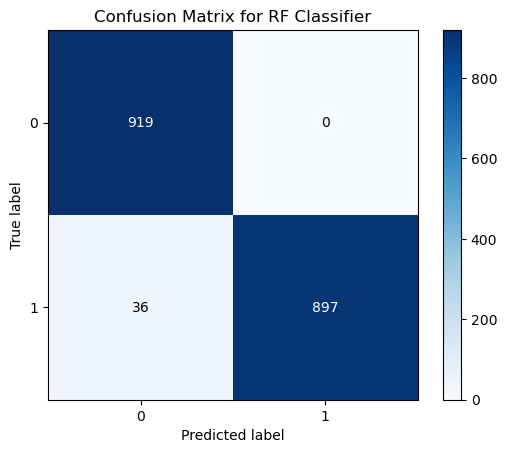

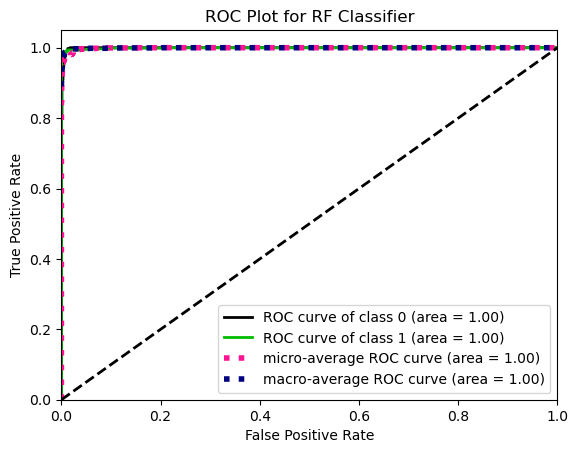

AUC: 1.00

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              1              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             0.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [5]:
# Random Forest Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt  # Make sure scikit-plot is installed
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
data_diagnosis1

# Assuming X contains your independent variables and y contains your dependent variable
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features,
        random_state=0
    )
    
    # Perform cross-validation (CV) on the training set
    cv_scores = cross_val_score(rf_classifier, X_trainval, y_trainval, scoring='accuracy', cv=5)
    
    # We minimize the negative cross-validation score because Bayesian Optimization minimizes functions
    return cv_scores.mean()

# Define the parameter bounds for the optimization process
param_bounds = {
    'n_estimators': (100, 500),           # Range for number of trees
    'max_depth': (5, 20),                 # Range for max depth
    'min_samples_split': (2, 10),         # Range for min samples split
    'min_samples_leaf': (1, 4),           # Range for min samples leaf
    'max_features': (0.5, 1.0)            # Fraction of features to consider at each split (between 50% and 100%)
}

# Set up the Bayesian Optimization instance
optimizer = BayesianOptimization(
    f=rf_cv,  # The function to optimize
    pbounds=param_bounds,  # The hyperparameter search space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbosity mode
)

# Run the optimization process
optimizer.maximize(
    init_points=2,  # Number of random steps before optimization
    n_iter=10  # Number of iterations of the optimization
)

# Print the best result found by Bayesian Optimization
print("Best Parameters Found by Bayesian Optimization:")
print(optimizer.max)

# Train the Random Forest with the best parameters found
best_params = optimizer.max['params']
best_rf_classifier = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0
)

best_rf_classifier.fit(X_trainval, y_trainval)

# Evaluate the model on validation set
y_pred_val = best_rf_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate and print the AUC score
from sklearn.metrics import roc_auc_score
auc_value = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC: {auc_value:.2f}")

# Extract results into a DataFrame
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('RF2_diagnosis result.csv', index=False)



Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Cross Validation Score: 0.9811


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.97841727 0.98381295 0.98381295 0.97841727 0.98561151 0.97482014
 0.98198198 0.97657658 0.98198198 0.98918919]
Average CV Score: 0.9814621816060664
Standard Deviation of CV Scores: 0.00
Validation Accuracy with Best Model: 0.9762419006479481
Test Accuracy with Best Model: 0.984341252699784

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       919
           1       1.00      0.97      0.98       933

    accuracy                           0.98      1852
   macro avg       0.98      0.98      0.98      1852
weighted avg       0.98      0.98      0.98      1852

Confusion Matrix:
[[919   0]
 [ 29 904]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9689


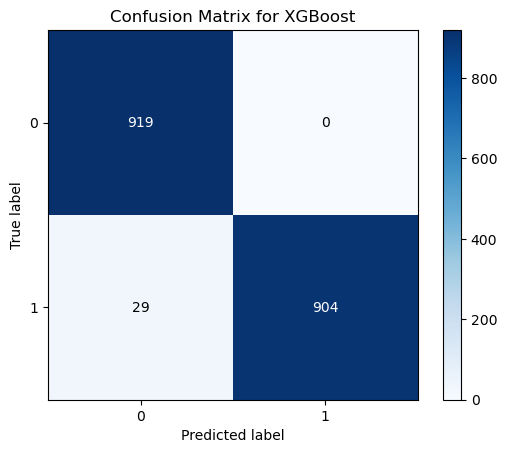

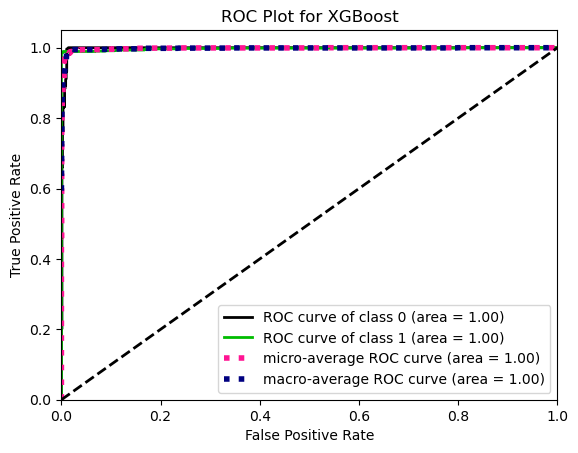


Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              1              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             0.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [6]:
# XGBoost Classifier with GridSearch Hyperparameter tuning
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Initialize the XGBoost classifier
classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [3, 5, 7],          # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'subsample': [0.8, 1.0],         # Subsample ratio of the training instance
    'colsample_bytree': [0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],          # Minimum loss reduction required to make a further partition
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")

# Evaluate the model with cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores: {:.2f}".format(cv_scores.std()))

# Make predictions on validation set
y_pred_val = best_model.predict(X_val)

# Evaluate the model on the validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print classification report and confusion matrix
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()

# Extract results into a DataFrame
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('XGB2_Gridsearch_diagnosis result.csv', index=False)



|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.9807    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.9816    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.9737    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.9791    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.9757    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.9831    | 0.9126    | 0.2278    | 9.49      | 1.261     | 458.3     | 0.757     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.9829    | 0.7416    | 0.1465    | 8.783     | 1.637     | 459.1     | 0.8716    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.9783    | 0.8218    | 0.2652    | 9.819     | 7.63      | 219.4     | 0.6544    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.9785    | 1.0       | 0.3       | 10.0      | 10.0      | 440.4     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.9823    | 0.6758    | 0.1851    | 8.304     | 3.338     | 399.2     | 0.9193    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.9746    | 0.6174    | 0.07271   | 6.869     | 9.628     | 379.3     | 0.8212    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.9629    | 1.0       | 0.01      | 3.0       | 10.0      | 407.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.981     | 0.7515    | 0.1699    | 7.768     | 5.34      | 454.3     | 0.7656    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.9838    | 0.7605    | 0.2435    | 9.466     | 1.234     | 393.0     | 0.9794    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.9725    | 0.9186    | 0.06119   | 3.0       | 1.0       | 393.7     | 0.8672    |
Best Hyperparameters found by Bayesian Optimization: {'colsample_bytree': 0.7605144814454549, 'learning_rate': 0.24353004224333172, 'max_depth': 9.466276076504938, 'min_child_weight': 1.233546172211696, 'n_estimators': 392.9696343908861, 'subsample': 0.9794431954250572}


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:35:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.97840756 0.98380567 0.98920378 0.99190283 0.98785425 0.98110661
 0.98110661 0.98785425 0.97162162 0.98648649]
Average CV Score: 0.9839349673560198
Standard Deviation: 0.005715467902559355
Validation Accuracy with Best Model: 0.9994600431965442
Test Accuracy with Best Model: 0.990280777537797

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       919
           1       1.00      0.98      0.99       933

    accuracy                           0.99      1852
   macro avg       0.99      0.99      0.99      1852
weighted avg       0.99      0.99      0.99      1852

Confusion Matrix:
[[919   0]
 [ 18 915]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9807


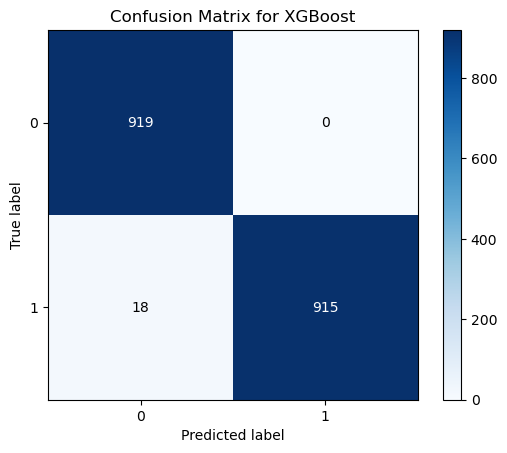

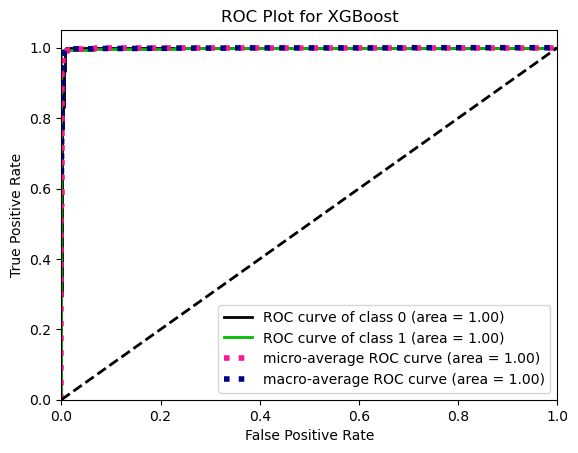

AUC: 1.00

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              1              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             0.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [7]:
# XGBoost Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    """Function to be optimized by Bayesian Optimization"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_trainval, y_trainval, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Create a BayesianOptimizer instance
optimizer = BayesianOptimization(
    f=xgb_cv,  # The function to optimize
    pbounds=param_bounds,  # Hyperparameter space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbose output during optimization
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=10)  # 5 random steps, followed by 10 optimization steps

# Retrieve the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters found by Bayesian Optimization:", best_params)

# Train the model with the best parameters found
best_xgb_classifier = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

best_xgb_classifier.fit(X_trainval, y_trainval)

# Perform Cross Validation on the training set
cv_scores = cross_val_score(best_xgb_classifier, X_trainval, y_trainval, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Make predictions on the validation set using the best model
y_pred_val = best_xgb_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_xgb_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_xgb_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()

# Extract probabilities for the positive class
y_pred_proba_positive = y_pred_proba[:, 1]  # Second column for positive class

# Calculate AUC score
auc_value = roc_auc_score(y_test, y_pred_proba_positive)
print(f"AUC: {auc_value:.2f}")


# Extract results into a DataFrame
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the data to a new CSV file (optional)
results_table.to_csv('XGB2_optimized_diagnosis result.csv', index=False)



C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.6546 - loss: 0.6082 - val_accuracy: 0.9060 - val_loss: 0.3740
Epoch 2/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9171 - loss: 0.3416 - val_accuracy: 0.9163 - val_loss: 0.2973
Epoch 3/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9251 - loss: 0.2757 - val_accuracy: 0.9158 - val_loss: 0.2570
Epoch 4/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9306 - loss: 0.2343 - val_accuracy: 0.9255 - val_loss: 0.2322
Epoch 5/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9255 - loss: 0.2263 - val_accuracy: 0.9206 - val_loss: 0.2199
Epoch 6/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9258 - loss: 0.2132 - val_accuracy: 0.9217 - val_loss: 0.2144
Epoch 7/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9259 - loss: 0.2054 - val_accuracy: 0.9217 - val_loss: 0.2084
Epoch 8/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9289 - loss: 0.199

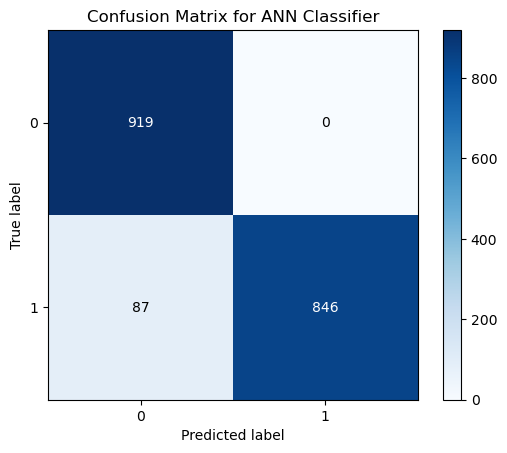

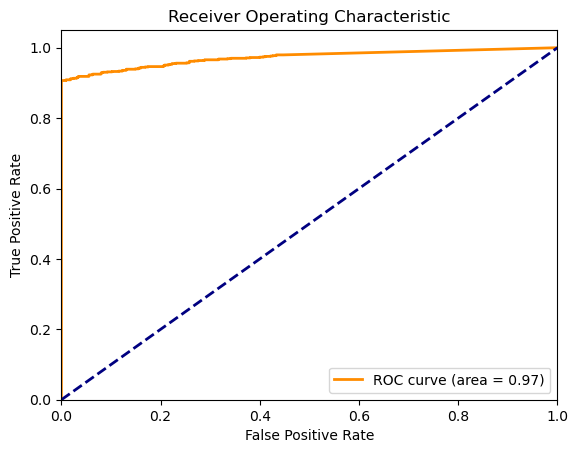

AUC: 0.97
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Table of Results:
   Original Test Data  Training Predictions  Validation Predictions  \
0                 0.0                     1                     0.0   
1                 1.0                     1                     0.0   
2                 1.0                     0                     0.0   
3                 0.0                     0                     1.0   
4                 1.0                     0                     1.0   

   Test Predictions  Training Error  Validation Error  Test Error  
0               0.0             1.0               0.0         0.0  
1               1.0             0.0              -1.0         0.0  
2               1.0            -1.0              -1.0         0.0  
3               0.0             0.0               1.0         0.0  
4               1.0            -1.0               0.0         0.0  


In [2]:
# Artificial Neural Networks 
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import scikitplot as skplt  # Make sure scikit-plot is installed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)


# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Building the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu', input_dim=8))

# Adding the second hidden layer
classifier.add(Dense(units=4, kernel_initializer='uniform', activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set with separate validation set
history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100)

# Predict Test Set Results
y_pred_proba = classifier.predict(X_test)  # Get probabilities
y_pred = (y_pred_proba > 0.5).astype(int)  # Convert to binary labels

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Print Classification Report and Confusion Matrix for test set
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Calculate per-class accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# Visualize the ROC Curve
# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC Score
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:.2f}")

# Prepare DataFrame of Results
original_data = pd.Series(y_test, name='Original Test Data').reset_index(drop=True)
train_preds = (classifier.predict(X_train) > 0.5).astype(int).ravel()
val_preds = (classifier.predict(X_val) > 0.5).astype(int).ravel()

training_data = pd.Series(train_preds, name='Training Predictions').reset_index(drop=True)
validation_data = pd.Series(val_preds, name='Validation Predictions').reset_index(drop=True)
test_data = pd.Series(y_pred.ravel(), name='Test Predictions').reset_index(drop=True)

# Ensure same length for concatenation
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1).head(len(original_data))

# Calculate Errors
results_table['Training Error'] = results_table['Training Predictions'] - results_table['Original Test Data']
results_table['Validation Error'] = results_table['Validation Predictions'] - results_table['Original Test Data']
results_table['Test Error'] = results_table['Test Predictions'] - results_table['Original Test Data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('ANN2_diagnosis result.csv', index=False)



|   iter    |  target   | learni... | units_... | units_... |
-------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
| 1         | 0.9779    | 0.03752   | 15.41     | 12.78     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
| 2         | 0.9603    | 0.05991   | 5.872     | 5.872     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
| 3         | 0.9597    | 0.06031   | 15.4      | 12.71     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
| 4         | 0.9333    | 0.0862    | 10.33     | 5.569     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 5         | 0.9796    | 0.003681  | 10.78     | 13.03     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
| 6         | 0.8977    | 0.08396   | 12.41     | 6.511     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 7         | 0.9718    | 0.0001    | 15.42     | 12.95     |
Best Hyperparameters found:
{'target': 0.979631676562626, 'params': {'learning_rate': 0.0036805570797140428, 'units_layer1': 10.776794404145251, 'units_layer2': 13.030250605523795}}


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8590 - loss: 0.3523 - val_accuracy: 0.9228 - val_loss: 0.1984
Epoch 2/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9341 - loss: 0.1758 - val_accuracy: 0.9374 - val_loss: 0.1751
Epoch 3/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9291 - loss: 0.1929 - val_accuracy: 0.9417 - val_loss: 0.1724
Epoch 4/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9436 - loss: 0.1666 - val_accuracy: 0.9438 - val_loss: 0.1699
Epoch 5/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9447 - loss: 0.1604 - val_accuracy: 0.9428 - val_loss: 0.1631
Epoch 6/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9403 - loss: 0.1680 - val_accuracy: 0.9422 - val_loss: 0.1676
Epoch 7/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9373 - loss: 0.1714 - val_accuracy: 0.9460 - val_loss: 0.1693
Epoch 8/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9441 - loss: 0.1591 - val_accu

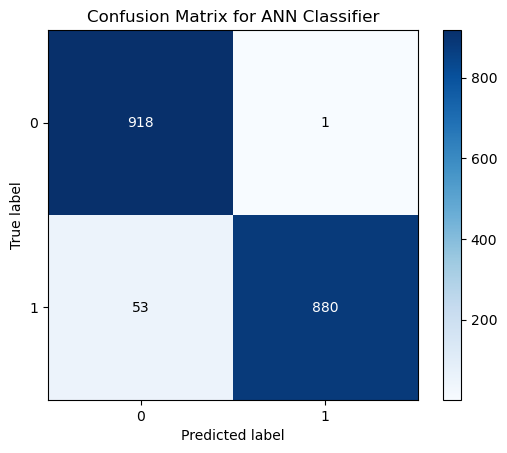

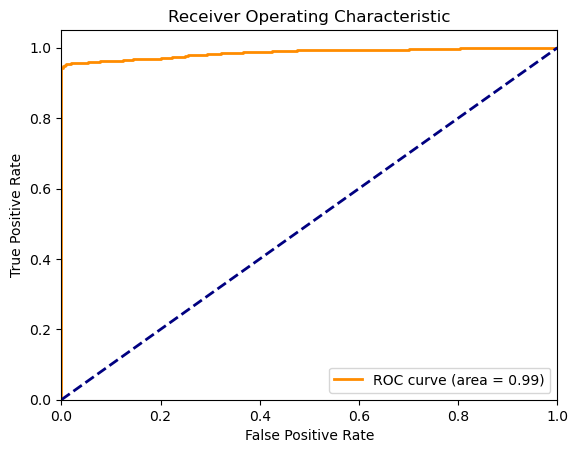

AUC: 0.99
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Table of Results:
   Original Test Data  Training Predictions  Validation Predictions  \
0                 0.0                     1                     0.0   
1                 1.0                     1                     0.0   
2                 1.0                     1                     0.0   
3                 0.0                     0                     1.0   
4                 1.0                     0                     1.0   

   Test Predictions  Training Error  Validation Error  Test Error  
0               0.0             1.0               0.0         0.0  
1               1.0             0.0              -1.0         0.0  
2               1.0             0.0              -1.0         0.0  
3               0.0             0.0               1.0         0.0  
4               1.0            -1.0               0.0         0.0  


In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import scikitplot as skplt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Define the model function to optimize using Bayesian Optimization
def build_and_train_model(learning_rate, units_layer1, units_layer2):
    # Build the ANN
    model = Sequential()

    # Input layer and the first hidden layer
    model.add(Dense(units=int(units_layer1), kernel_initializer='uniform', activation='relu', input_dim=8))

    # Second hidden layer
    model.add(Dense(units=int(units_layer2), kernel_initializer='uniform', activation='relu'))

    # Output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile the ANN
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the ANN
    model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100, verbose=0)

    # Validate the model using AUC score
    y_pred_val_proba = model.predict(X_val)
    auc_val = roc_auc_score(y_val, y_pred_val_proba)
    
    return auc_val

# Define the hyperparameter search space for Bayesian Optimization
pbounds = {
    'learning_rate': (0.0001, 0.1),
    'units_layer1': (4, 16),
    'units_layer2': (4, 16),
}

# Set up the optimizer
optimizer = BayesianOptimization(
    f=build_and_train_model,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Run the optimizer
optimizer.maximize(init_points=2, n_iter=5)

# Print the best parameters found
print("Best Hyperparameters found:")
print(optimizer.max)

# Extract best hyperparameters
best_params = optimizer.max['params']
best_learning_rate = best_params['learning_rate']
best_units_layer1 = int(best_params['units_layer1'])
best_units_layer2 = int(best_params['units_layer2'])

# Build and train the final model with the best parameters
classifier = Sequential()
classifier.add(Dense(units=best_units_layer1, kernel_initializer='uniform', activation='relu', input_dim=8))
classifier.add(Dense(units=best_units_layer2, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model with the best learning rate
optimizer = Adam(learning_rate=best_learning_rate)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100)

# Predict Test Set Results
y_pred_proba = classifier.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Per-Class Accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# AUC Score
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:.2f}")

# Prepare DataFrame of Results
original_data = pd.Series(y_test, name='Original Test Data').reset_index(drop=True)
train_preds = (classifier.predict(X_train) > 0.5).astype(int).ravel()
val_preds = (classifier.predict(X_val) > 0.5).astype(int).ravel()

training_data = pd.Series(train_preds, name='Training Predictions').reset_index(drop=True)
validation_data = pd.Series(val_preds, name='Validation Predictions').reset_index(drop=True)
test_data = pd.Series(y_pred.ravel(), name='Test Predictions').reset_index(drop=True)

# Ensure same length for concatenation
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1).head(len(original_data))

# Calculate Errors
results_table['Training Error'] = results_table['Training Predictions'] - results_table['Original Test Data']
results_table['Validation Error'] = results_table['Validation Predictions'] - results_table['Original Test Data']
results_table['Test Error'] = results_table['Test Predictions'] - results_table['Original Test Data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('ANN2_optimized_diagnosis result.csv', index=False)



Cross Validation Scores: [0.87719298 0.89608637 0.90013495 0.88259109 0.87989204 0.86234818
 0.87044534 0.87719298 0.9027027  0.89054054]
Average CV Score: 0.8839127183864026
Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.3s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric

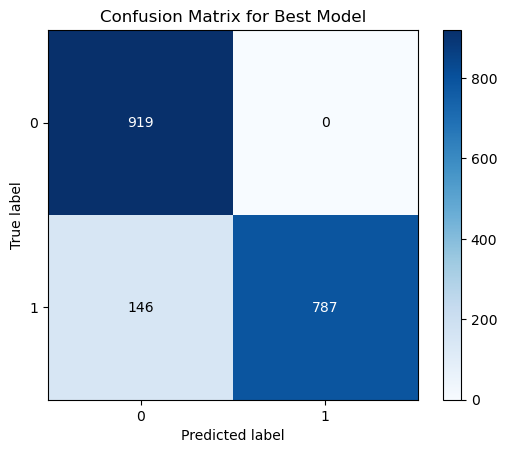

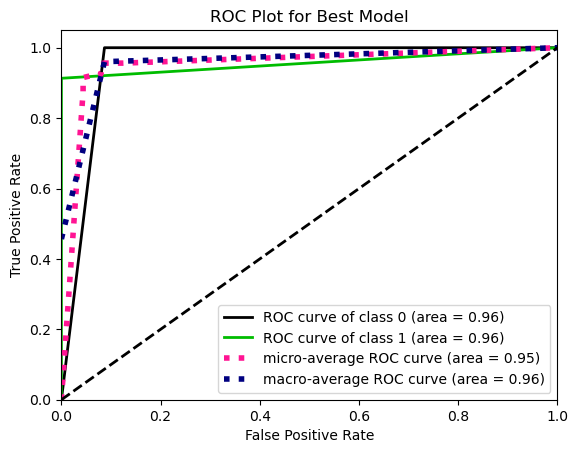

AUC with Best Model: 0.92

Table of Results with Best Model:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              1              0.0        0.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             0.0              -1.0        -1.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [9]:
# KNN Classifier with GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting KNN to the Training Set
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski', p=2, n_jobs=-1)
knn_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 10
cv_scores = cross_val_score(knn_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Define parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2] # The power parameter for the Minkowski metric
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")


# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_pred_test = best_model.predict(X_test)

# Evaluate the best model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nKNN Classifier with Best Model:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for Best Model')
plt.show()

# Plot ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for Best Model')
plt.show()

# Calculate AUC Score for best model
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC with Best Model: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results with Best Model:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('KNN2_diagnosis result.csv', index=False)



Cross Validation Scores: [0.87589928 0.90647482 0.9118705  0.89388489 0.90647482 0.88129496
 0.90990991 0.91171171 0.86846847 0.90990991]
Average CV Score: 0.897589928057554
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END .......................

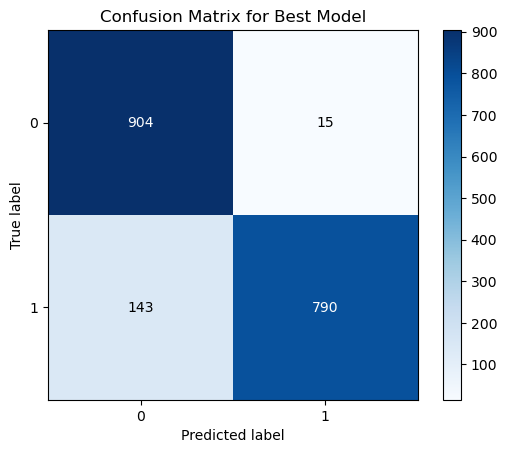

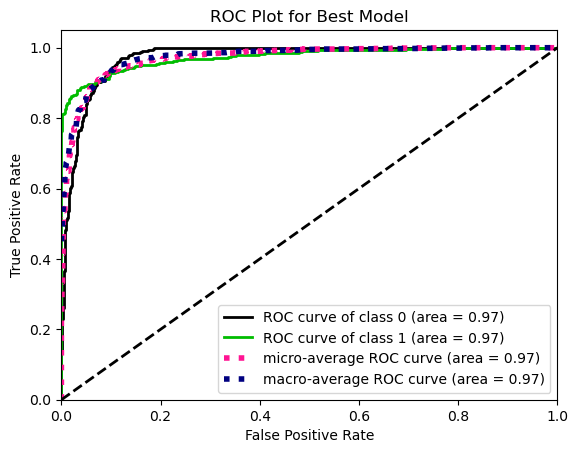

AUC with Best Model: 0.92

Table of Results with Best Model:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              0              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2            -1.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [10]:
# Naive Bayes Algorithm with GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Naive Bayes classifier
NBclassifier = GaussianNB()

# Train the model
NBclassifier.fit(X_train, y_train)

# Perform Cross Validation
k = 10
scores = cross_val_score(NBclassifier, X_train, y_train, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())


# Define parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=NBclassifier, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")

# Perform Cross Validation using the best model
k = 10
scores = cross_val_score(best_model, X_train, y_train, cv=k)
print("Cross Validation Scores with Best Model:", scores)
print("Average CV Score with Best Model:", scores.mean())

# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_predNB = best_model.predict(X_test)

# Evaluate the best model on test set
accuracy = accuracy_score(y_test, y_predNB)
print("Test Accuracy with Best Model:", accuracy)

# Print Classification Report and Confusion Matrix
print("\nNaive Bayes Classifier with Best Model:")
print(classification_report(y_test, y_predNB))
cm = confusion_matrix(y_test, y_predNB)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize metrics using Scikit-Plot
skplt.metrics.plot_confusion_matrix(y_test, y_predNB, normalize=False, title='Confusion Matrix for Best Model')
plt.show()

# Visualize the ROC Curve
y_NB_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_NB_proba, title='ROC Plot for Best Model')
plt.show()

# Calculate AUC Score for best model
auc_value = roc_auc_score(y_test, y_predNB, multi_class='ovr')
print(f"AUC with Best Model: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predNB, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results with Best Model:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('NB2_diagnosis result.csv', index=False)



In [4]:
# SVC Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)




In [5]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Instantiate the SVC model
SVCclassifier = SVC(C=5, kernel='linear', decision_function_shape="ovr", probability = True, random_state=0)

# Train the model
SVCclassifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 10
scores = cross_val_score(SVCclassifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

Cross Validation Scores: [0.91632928 0.92847503 0.93252362 0.94466937 0.9217274  0.91497976
 0.90283401 0.92307692 0.9027027  0.93648649]
Average CV Score: 0.9223804573804573


In [6]:

# Applying Grid Search to find the best model and the best parameters
# Importing necessary modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GridSearch
parameters = [
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

# Applying Grid Search to find the best model and the best parameters
grid_search = GridSearchCV(estimator=SVCclassifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Getting the best accuracy and parameters
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# Output the results
print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)


Best Accuracy: 96.71 %
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


Cross Validation Scores with Best Model: [0.96043165 0.97122302 0.96582734 0.96043165 0.97302158 0.95683453
 0.98018018 0.96576577 0.96396396 0.97297297]
Average CV Score with Best Model: 0.9670652667055546
Validation Accuracy with Best Model: 0.964902807775378
Test Accuracy: 0.9703023758099352

SVC Classifier:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       919
           1       1.00      0.94      0.97       933

    accuracy                           0.97      1852
   macro avg       0.97      0.97      0.97      1852
weighted avg       0.97      0.97      0.97      1852

Confusion Matrix:
[[919   0]
 [ 55 878]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9411


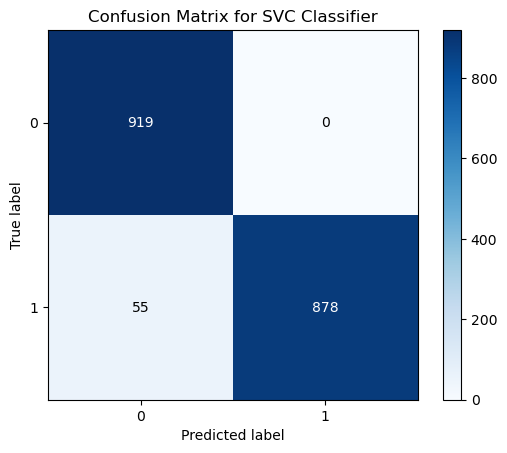

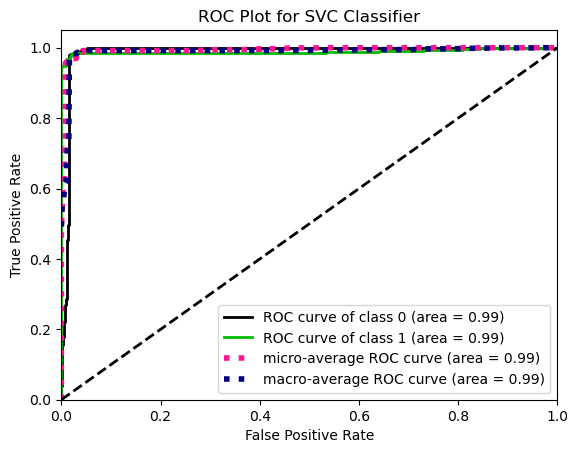

AUC: 0.97

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              1              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             0.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [8]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform Cross Validation using the best model
k = 10
scores = cross_val_score(best_model, X_train, y_train, cv=k)
print("Cross Validation Scores with Best Model:", scores)
print("Average CV Score with Best Model:", scores.mean())

# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_predSVC = best_model.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predSVC)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nSVC Classifier:")
print(classification_report(y_test, y_predSVC))
cm = confusion_matrix(y_test, y_predSVC)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predSVC, normalize=False, title='Confusion Matrix for SVC Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for SVC Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_model.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predSVC, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predSVC, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('SVC2_diagnosis result.csv', index=False)



Cross Validation Scores: [0.91007194 0.90647482 0.92805755 0.91007194 0.92266187 0.91726619
 0.92432432 0.91891892 0.91171171 0.93873874]
Average CV Score: 0.9188298010240457
Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   1.0s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.4s
[CV] END ..................C=0.1,

C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.8s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   2.6s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   1.3s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.8s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.5s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.4s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.5s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.6s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.3s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ....................C=1, max_iter=500, solver=lbfgs; total time=   0.3s
[CV] END ...................

C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1212, in fit
    multi_c

Best Hyperparameters: {'C': 1, 'max_iter': 500, 'solver': 'lbfgs'}
Best Cross Validation Score: 0.9188
Validation Accuracy with Best Model: 0.9109071274298056
Test Accuracy with Best Model: 0.9190064794816415
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       919
           1       0.94      0.89      0.92       933

    accuracy                           0.92      1852
   macro avg       0.92      0.92      0.92      1852
weighted avg       0.92      0.92      0.92      1852

Confusion Matrix:
[[867  52]
 [ 98 835]]
Accuracy for class 0: 0.9434
Accuracy for class 1: 0.8950


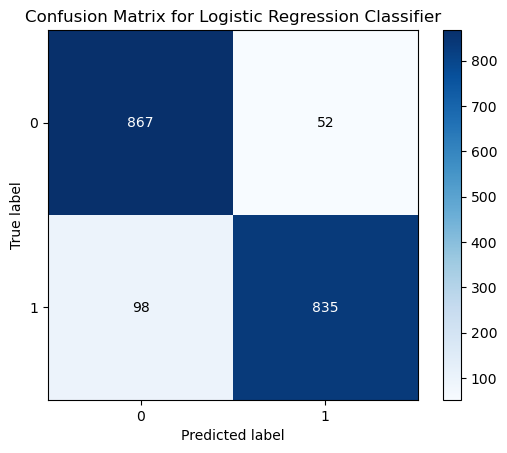

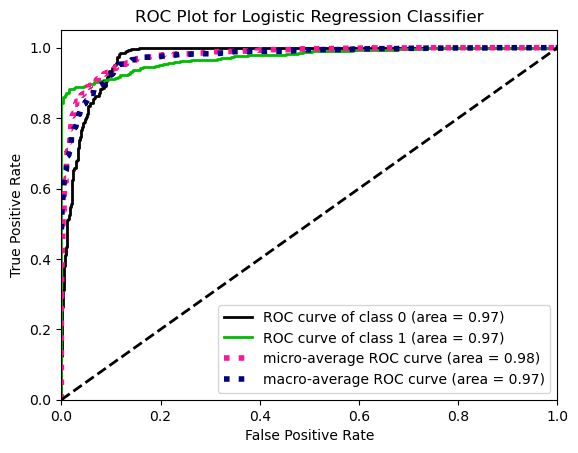

AUC: 0.92

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              0              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2            -1.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [17]:
#Logistic Regression with Random search hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)


# Find the number of unique classes
n_classes = len(np.unique(y))

# Instantiate the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 10
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Define parameter grid for GridSearchCV
param_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")

# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_pred_test = best_model.predict(X_test)

# Evaluate the best model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Additional evaluation metrics (optional)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for Logistic Regression Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_model.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('Log2_diagnosis result.csv', index=False)



Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'class_weight': None}
Cross Validation Scores: [0.9757085  0.98650472 0.99190283 0.99190283 0.9851552  0.98650472
 0.97975709 0.98650472 0.97837838 0.99189189]
Average CV Score: 0.9854210891052997
Validation Accuracy: 0.9994600431965442
DT_Test Accuracy: 0.9848812095032398


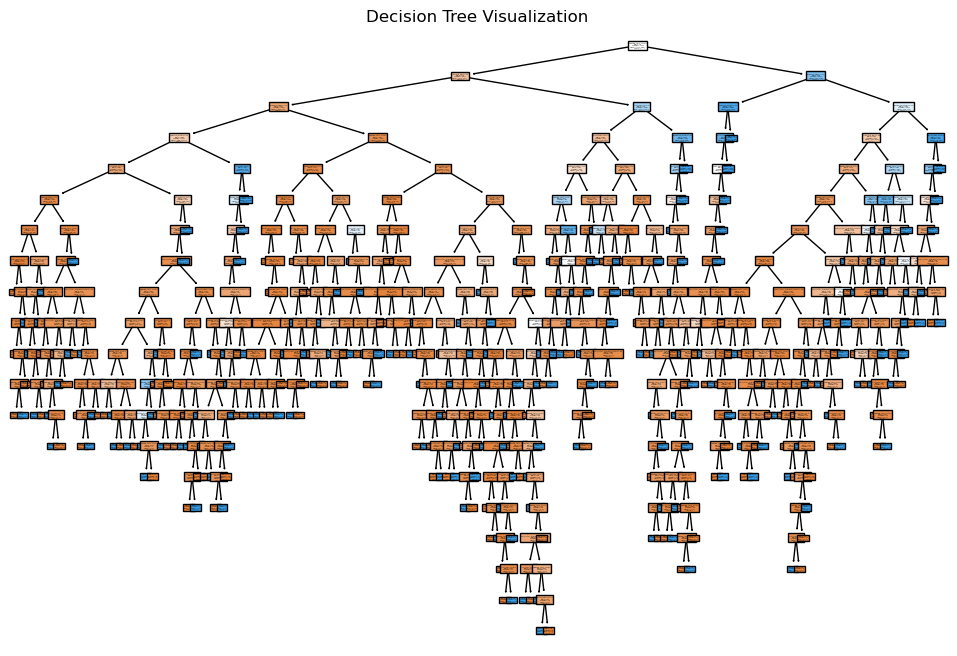


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       919
           1       1.00      0.97      0.98       933

    accuracy                           0.98      1852
   macro avg       0.99      0.98      0.98      1852
weighted avg       0.99      0.98      0.98      1852

Confusion Matrix:
[[919   0]
 [ 28 905]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9700


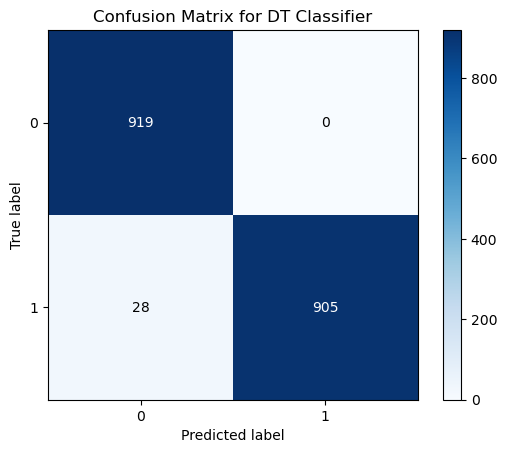

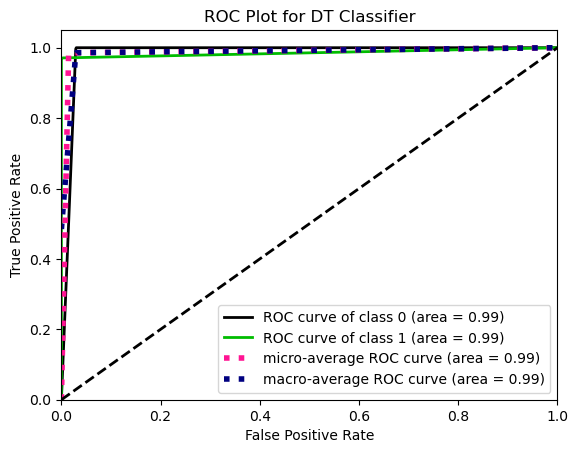

AUC: 0.98

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   0.0              1              0.0        0.0   
1                   1.0              1              0.0        1.0   
2                   1.0              1              0.0        1.0   
3                   0.0              0              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             1.0               0.0         0.0  
1             0.0              -1.0         0.0  
2             0.0              -1.0         0.0  
3             0.0               1.0         0.0  
4            -1.0               0.0         0.0  


In [10]:
# Decision Tree Classifier with RandomizedSearch hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Import the dataset
data_diagnosis1

# Independent (X) and dependent (y) variables
X = data_diagnosis1.iloc[:, 0:8].values
y = data_diagnosis1.iloc[:, 8].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': ['balanced', None]  # Weights associated with classes
}

# Create an instance of Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=10, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_dt_classifier = random_search.best_estimator_

# Perform Cross Validation on training set
k = 10
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_preddt = best_dt_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_preddt)
print("DT_Test Accuracy:", accuracy_test)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, 
          filled=True, 
          feature_names=data_diagnosis1.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()


# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('DT2_diagnosis result.csv', index=False)


# Predictions of Diagnosis 2

In [1]:
import numpy as np
import pandas as pd
data_diagnosis2 = pd.read_csv('Modified_breast_cancer_diagnosis_data2___.csv')
data_diagnosis2.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Tumor_Size_mm  Breast_Lump  Breast_Biopsy  Genetic_Mutation  \
0             50            0              0                 1   
1             77            1              0                 1   
2             54            0              0                 0   
3             54            1              0                 2   
4             97            1              1                 1   

   Hormone_Receptor_Status  Diagnosis_Status  
0                        0                 1  
1                        0                 1  
2                        1                 1  
3                        1                 1  
4                        1                 1

In [2]:
# SVC Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Import the dataset
data_diagnosis2

# Independent (X) and dependent (y) variables
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)


In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Instantiate the SVC model
SVCclassifier = SVC(C=5, kernel='linear', decision_function_shape="ovr", probability = True, random_state=0)

# Train the model
SVCclassifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 10
scores = cross_val_score(SVCclassifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())



Cross Validation Scores: [0.91767881 0.93117409 0.9365722  0.94601889 0.9217274  0.91632928
 0.90418354 0.92307692 0.90810811 0.93783784]
Average CV Score: 0.9242707079549186


In [4]:
# Applying Grid Search to find the best model and the best parameters
# Importing necessary modules
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GridSearch
parameters = [
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
    {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

# Applying Grid Search to find the best model and the best parameters
grid_search = GridSearchCV(estimator=SVCclassifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=-1)

# Fitting the grid search
grid_search.fit(X_train, y_train)

# Getting the best accuracy and parameters
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

# Output the results
print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_parameters)


Best Accuracy: 97.17 %
Best Parameters: {'C': 1, 'gamma': 0.9, 'kernel': 'rbf'}


Cross Validation Scores with Best Model: [0.9676259  0.97302158 0.9676259  0.97482014 0.9676259  0.97122302
 0.98378378 0.96936937 0.96036036 0.98198198]
Average CV Score with Best Model: 0.9717437941538659
Validation Accuracy with Best Model: 0.974622030237581
Test Accuracy: 0.9778617710583153

SVC Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       919
           1       1.00      0.96      0.98       933

    accuracy                           0.98      1852
   macro avg       0.98      0.98      0.98      1852
weighted avg       0.98      0.98      0.98      1852

Confusion Matrix:
[[919   0]
 [ 41 892]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9561


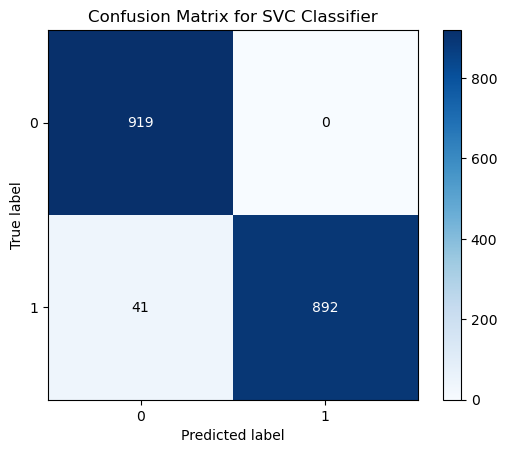

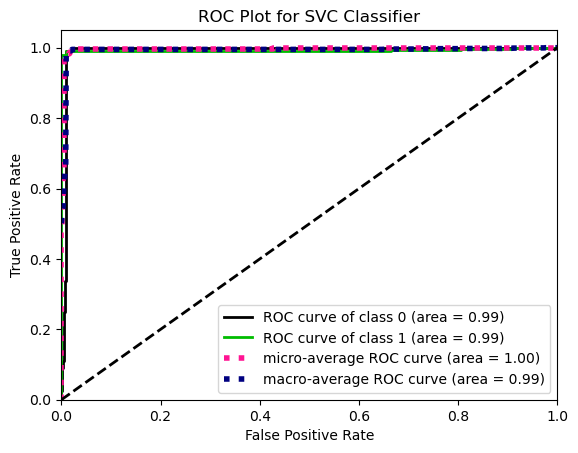

AUC: 0.98

Table of Results:
   Original y_test data  Original y_val data  Training data  Validation data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              1              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test data  Validation_error  Test_error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        1.0               0.0         0.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [6]:

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform Cross Validation using the best model
k = 10
scores = cross_val_score(best_model, X_train, y_train, cv=k)
print("Cross Validation Scores with Best Model:", scores)
print("Average CV Score with Best Model:", scores.mean())

# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_predSVC = best_model.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_predSVC)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nSVC Classifier:")
print(classification_report(y_test, y_predSVC))
cm = confusion_matrix(y_test, y_predSVC)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_confusion_matrix(y_test, y_predSVC, normalize=False, title='Confusion Matrix for SVC Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for SVC Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_model.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_predSVC, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_test_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predSVC, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_val data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('SVC3_diagnosis result.csv', index=False)



|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:00:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:00:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:00:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.9788    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:00:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.9807    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.9737    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.9787    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.9757    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.9785    | 0.7022    | 0.02267   | 9.471     | 2.39      | 448.9     | 0.8995    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.9741    | 0.8154    | 0.01978   | 9.158     | 5.225     | 416.2     | 0.6277    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.9803    | 0.7633    | 0.3       | 9.734     | 4.439     | 416.7     | 0.7998    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.9798    | 0.8654    | 0.09217   | 9.955     | 4.402     | 416.9     | 0.9446    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.98      | 0.9389    | 0.1915    | 9.774     | 4.779     | 416.7     | 0.9294    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.9737    | 0.7777    | 0.01      | 9.514     | 4.493     | 416.9     | 0.7917    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.9798    | 0.9589    | 0.2069    | 5.89      | 5.266     | 413.1     | 0.7571    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:01:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.9761    | 0.9116    | 0.07955   | 5.417     | 7.384     | 444.8     | 0.6642    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.9812    | 0.8671    | 0.2686    | 9.943     | 4.55      | 416.6     | 0.9086    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.9788    | 0.8079    | 0.06096   | 9.894     | 4.443     | 416.5     | 0.855     |
Best Hyperparameters found by Bayesian Optimization: {'colsample_bytree': 0.8671346949902714, 'learning_rate': 0.2685982216101218, 'max_depth': 9.943437309399977, 'min_child_weight': 4.550016921623859, 'n_estimators': 416.63705963323804, 'subsample': 0.9086382986580301}


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.97165992 0.9851552  0.9851552  0.98785425 0.98245614 0.9757085
 0.97840756 0.98785425 0.96891892 0.98378378]
Average CV Score: 0.9806953714848451
Standard Deviation: 0.006366670794629697
Validation Accuracy with Best Model: 0.9994600431965442
Test Accuracy with Best Model: 0.9892008639308856

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       919
           1       1.00      0.98      0.99       933

    accuracy                           0.99      1852
   macro avg       0.99      0.99      0.99      1852
weighted avg       0.99      0.99      0.99      1852

Confusion Matrix:
[[919   0]
 [ 20 913]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9786


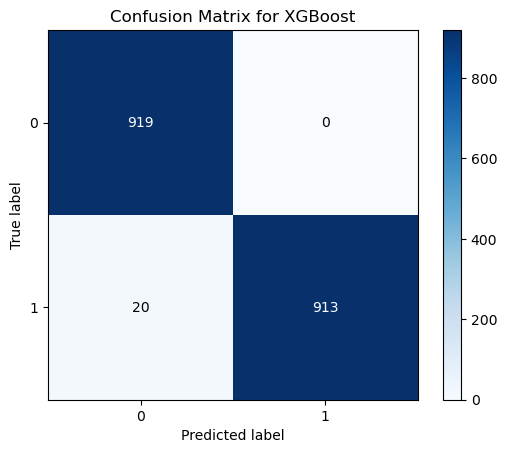

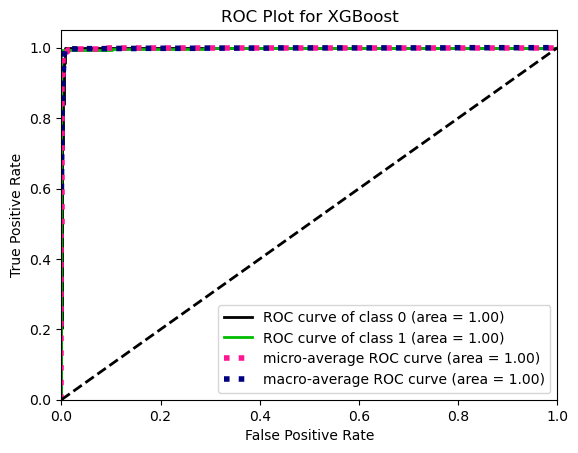

AUC: 1.00

Table of Results:
   Original y_test data  Original y_val data  Training data  Validation data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              1              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test data  Validation_error  Test_error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        1.0               0.0         0.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [7]:
# XGBoost Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Import the dataset
data_diagnosis2

# Independent (X) and dependent (y) variables
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    """Function to be optimized by Bayesian Optimization"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_trainval, y_trainval, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Create a BayesianOptimizer instance
optimizer = BayesianOptimization(
    f=xgb_cv,  # The function to optimize
    pbounds=param_bounds,  # Hyperparameter space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbose output during optimization
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=10)  # 5 random steps, followed by 10 optimization steps

# Retrieve the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters found by Bayesian Optimization:", best_params)

# Train the model with the best parameters found
best_xgb_classifier = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

best_xgb_classifier.fit(X_trainval, y_trainval)

# Perform Cross Validation on the training set
cv_scores = cross_val_score(best_xgb_classifier, X_trainval, y_trainval, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Make predictions on the validation set using the best model
y_pred_val = best_xgb_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_xgb_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_xgb_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()

# Extract probabilities for the positive class
y_pred_proba_positive = y_pred_proba[:, 1]  # Second column for positive class

# Calculate AUC score
auc_value = roc_auc_score(y_test, y_pred_proba_positive)
print(f"AUC: {auc_value:.2f}")


# Extract results into a DataFrame
original_test_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val data').reset_index(drop=True)
training_data = pd.Series(best_xgb_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_val data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the data to a new CSV file (optional)
results_table.to_csv('XGB3_optimized_diagnosis result.csv', index=False)



|   iter    |  target   | learni... | units_... | units_... |
-------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 1         | 0.9747    | 0.03752   | 15.46     | 13.05     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 2         | 0.9657    | 0.05991   | 6.716     | 6.716     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 3         | 0.9405    | 0.08615   | 15.5      | 13.09     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
| 4         | 0.9187    | 0.0862    | 10.81     | 6.439     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
| 5         | 0.9827    | 0.003681  | 11.21     | 13.28     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
| 6         | 0.9238    | 0.08396   | 12.71     | 7.302     |


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
| 7         | 0.9708    | 0.04841   | 15.01     | 5.452     |
Best Hyperparameters found:
{'target': 0.982740529000977, 'params': {'learning_rate': 0.0036805570797140428, 'units_layer1': 11.212061537133145, 'units_layer2': 13.277729721730145}}


C:\Users\opeye\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8569 - loss: 0.3633 - val_accuracy: 0.9298 - val_loss: 0.1860
Epoch 2/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9289 - loss: 0.1945 - val_accuracy: 0.9395 - val_loss: 0.1760
Epoch 3/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9391 - loss: 0.1695 - val_accuracy: 0.9390 - val_loss: 0.1716
Epoch 4/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9441 - loss: 0.1609 - val_accuracy: 0.9433 - val_loss: 0.1658
Epoch 5/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9426 - loss: 0.1537 - val_accuracy: 0.9476 - val_loss: 0.1616
Epoch 6/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9423 - loss: 0.1616 - val_accuracy: 0.9401 - val_loss: 0.1673
Epoch 7/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9518 - loss: 0.1459 - val_accuracy: 0.9395 - val_loss: 0.1680
Epoch 8/100
556/556 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9506 - loss: 0.1535 - val_accu

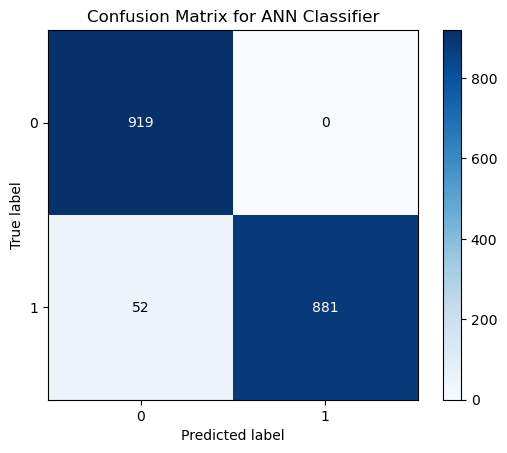

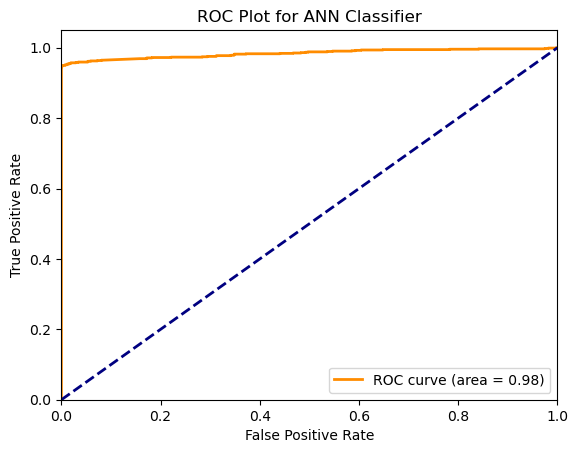

AUC: 0.98
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Table of Results:
   Original y_test Data  Original y_val Data  Training Data  Validation Data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              1              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test Data  Validation Error  Test Error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        1.0               0.0         0.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
import scikitplot as skplt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

# Import the dataset
data_diagnosis2

# Independent (X) and dependent (y) variables
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

# Define the model function to optimize using Bayesian Optimization
def build_and_train_model(learning_rate, units_layer1, units_layer2):
    # Build the ANN
    model = Sequential()

    # Input layer and the first hidden layer
    model.add(Dense(units=int(units_layer1), kernel_initializer='uniform', activation='relu', input_dim=9))

    # Second hidden layer
    model.add(Dense(units=int(units_layer2), kernel_initializer='uniform', activation='relu'))

    # Output layer
    model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    # Compile the ANN
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the ANN
    model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100, verbose=0)

    # Validate the model using AUC score
    y_pred_val_proba = model.predict(X_val)
    auc_val = roc_auc_score(y_val, y_pred_val_proba)
    
    return auc_val

# Define the hyperparameter search space for Bayesian Optimization
pbounds = {
    'learning_rate': (0.0001, 0.1),
    'units_layer1': (5, 16),
    'units_layer2': (5, 16),
}

# Set up the optimizer
optimizer = BayesianOptimization(
    f=build_and_train_model,
    pbounds=pbounds,
    random_state=42,
    verbose=2
)

# Run the optimizer
optimizer.maximize(init_points=2, n_iter=5)

# Print the best parameters found
print("Best Hyperparameters found:")
print(optimizer.max)

# Extract best hyperparameters
best_params = optimizer.max['params']
best_learning_rate = best_params['learning_rate']
best_units_layer1 = int(best_params['units_layer1'])
best_units_layer2 = int(best_params['units_layer2'])

# Build and train the final model with the best parameters
classifier = Sequential()
classifier.add(Dense(units=best_units_layer1, kernel_initializer='uniform', activation='relu', input_dim=9))
classifier.add(Dense(units=best_units_layer2, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compile the model with the best learning rate
optimizer = Adam(learning_rate=best_learning_rate)
classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = classifier.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=10, epochs=100)

# Predict Test Set Results
y_pred_proba = classifier.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("\nANN Classifier:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(cm)

# Per-Class Accuracies
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, title='Confusion Matrix for ANN Classifier')
plt.show()

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Plot for ANN Classifier')
plt.legend(loc='lower right')
plt.show()

# AUC Score
auc_value = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc_value:.2f}")

# Prepare DataFrame of Results
original_test_data = pd.Series(y_test, name='Original y_test Data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val Data').reset_index(drop=True)
train_preds = (classifier.predict(X_train) > 0.5).astype(int).ravel()
val_preds = (classifier.predict(X_val) > 0.5).astype(int).ravel()

training_data = pd.Series(train_preds, name='Training Data').reset_index(drop=True)
validation_data = pd.Series(val_preds, name='Validation Data').reset_index(drop=True)
test_data = pd.Series(y_pred.ravel(), name='Test Data').reset_index(drop=True)

# Ensure same length for concatenation
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1).head(len(original_test_data))

# Calculate Errors
results_table['Validation Error'] = results_table['Validation Data'] - results_table['Original y_val Data']
results_table['Test Error'] = results_table['Test Data'] - results_table['Original y_test Data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('ANN3_optimized_diagnosis result.csv', index=False)



Cross Validation Scores: [0.86909582 0.89608637 0.89608637 0.88259109 0.87854251 0.86639676
 0.86369771 0.87044534 0.8972973  0.88513514]
Average CV Score: 0.8805374402742825
Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.2s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.1s
[CV] END metric

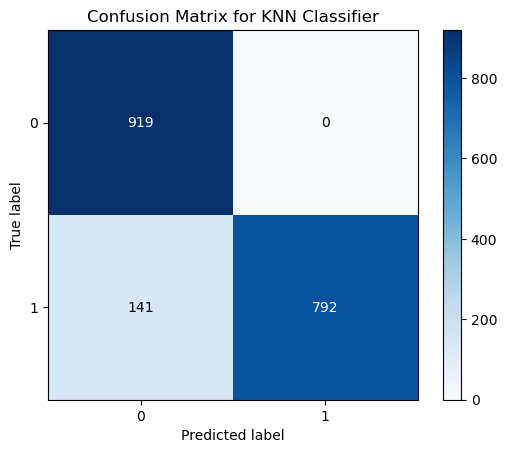

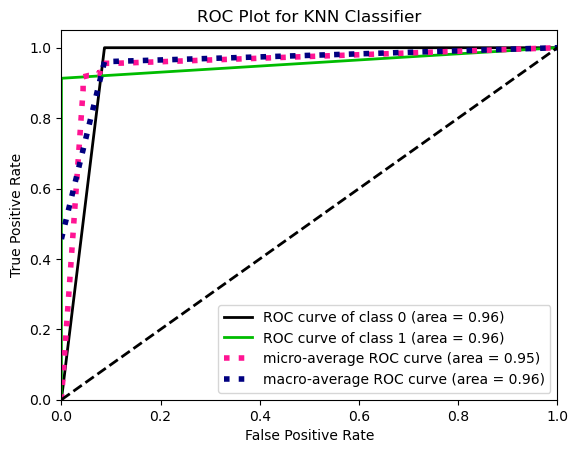

AUC with Best Model: 0.92

Table of Results with Best Model:
   Original y_test data  Original y_val data  Training data  Validation data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              1              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test data  Validation_error  Test_error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        0.0               0.0        -1.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [3]:
# KNN Classifier with GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics

# Import the dataset
data_diagnosis2

# Independent (X) and dependent (y) variables
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Fitting KNN to the Training Set
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski', p=2, n_jobs=-1)
knn_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 10
cv_scores = cross_val_score(knn_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Define parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2] # The power parameter for the Minkowski metric
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")


# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_pred_test = best_model.predict(X_test)

# Evaluate the best model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nKNN Classifier with Best Model:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for KNN Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for KNN Classifier')
plt.show()

# Calculate AUC Score for best model
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC with Best Model: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_test_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_val data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results with Best Model:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('KNN3_diagnosis result.csv', index=False)



Cross Validation Scores: [0.87230216 0.9028777  0.91366906 0.89928058 0.90107914 0.88669065
 0.91531532 0.90810811 0.87387387 0.90810811]
Average CV Score: 0.8981304685980944
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ......................

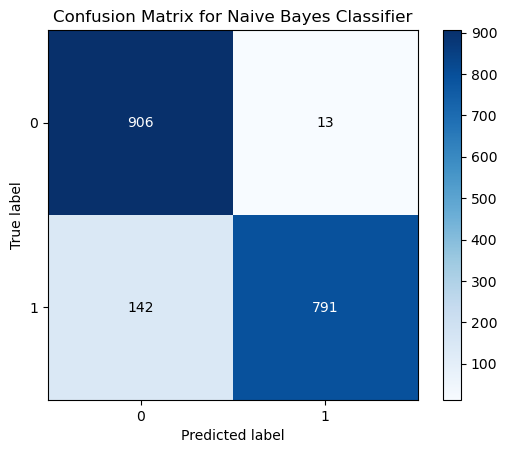

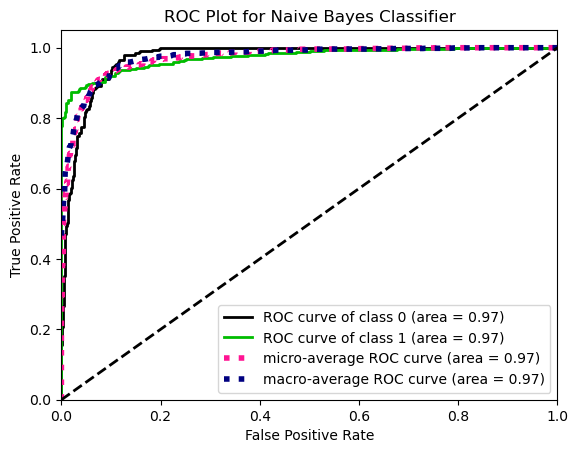

AUC with Best Model: 0.92

Table of Results with Best Model:
   Original y_test data  Original y_val data  Training data  Validation data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              0              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test data  Validation_error  Test_error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        1.0               0.0         0.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [5]:
# Naive Bayes Algorithm with GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Import the dataset
data_diagnosis2

# Independent (X) and dependent (y) variables
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Instantiate the Naive Bayes classifier
NBclassifier = GaussianNB()

# Train the model
NBclassifier.fit(X_train, y_train)

# Perform Cross Validation
k = 10
scores = cross_val_score(NBclassifier, X_train, y_train, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())


# Define parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=NBclassifier, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")

# Perform Cross Validation using the best model
k = 10
scores = cross_val_score(best_model, X_train, y_train, cv=k)
print("Cross Validation Scores with Best Model:", scores)
print("Average CV Score with Best Model:", scores.mean())

# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_predNB = best_model.predict(X_test)

# Evaluate the best model on test set
accuracy = accuracy_score(y_test, y_predNB)
print("Test Accuracy with Best Model:", accuracy)

# Print Classification Report and Confusion Matrix
print("\nNaive Bayes Classifier with Best Model:")
print(classification_report(y_test, y_predNB))
cm = confusion_matrix(y_test, y_predNB)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize metrics using Scikit-Plot
skplt.metrics.plot_confusion_matrix(y_test, y_predNB, normalize=False, title='Confusion Matrix for Naive Bayes Classifier')
plt.show()

# Visualize the ROC Curve
y_NB_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_NB_proba, title='ROC Plot for Naive Bayes Classifier')
plt.show()

# Calculate AUC Score for best model
auc_value = roc_auc_score(y_test, y_predNB, multi_class='ovr')
print(f"AUC with Best Model: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_test_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predNB, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_val data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results with Best Model:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('NB3_diagnosis result.csv', index=False)



Cross Validation Scores: [0.9028777  0.90647482 0.92625899 0.91007194 0.92266187 0.91546763
 0.92252252 0.91711712 0.90990991 0.94234234]
Average CV Score: 0.9175704841532181
Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ..................C=0.1,

C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1

C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.3s
[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.3s
[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.2s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.7s
[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.4s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.3s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.5s
[CV] END ...................C=10, max_iter=100, solver=lbfgs; total time=   0.9s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...............C=10, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...................

C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.1s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.2s
[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.3s
[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.4s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.5s


C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.6s
[CV] END ..................C=100, max_iter=100, solver=lbfgs; total time=   0.8s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..............C=100, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ..................C

C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\opeye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1212, in fit
    multi_c

Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
Best Cross Validation Score: 0.9188
Validation Accuracy with Best Model: 0.9092872570194385
Test Accuracy with Best Model: 0.9184665226781857
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       919
           1       0.94      0.89      0.92       933

    accuracy                           0.92      1852
   macro avg       0.92      0.92      0.92      1852
weighted avg       0.92      0.92      0.92      1852

Confusion Matrix:
[[868  51]
 [100 833]]
Accuracy for class 0: 0.9445
Accuracy for class 1: 0.8928


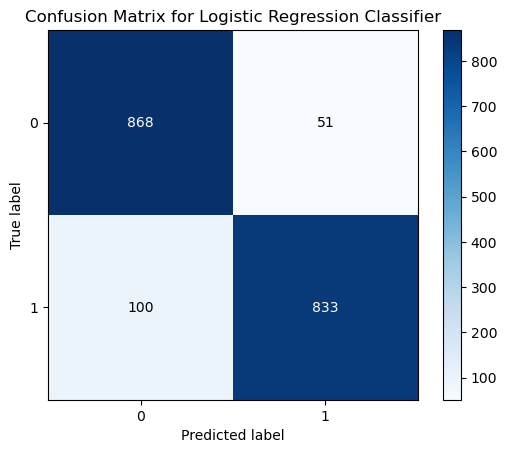

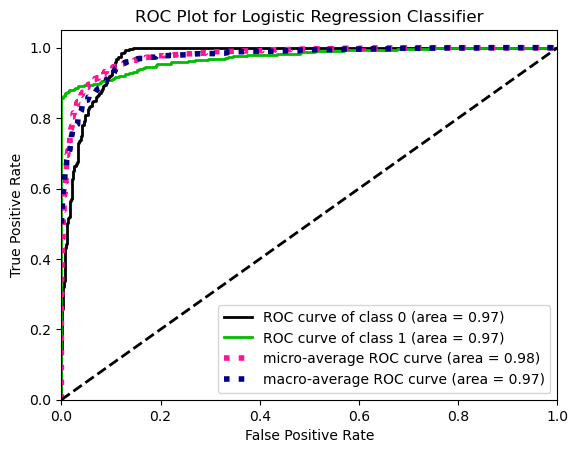

AUC: 0.92

Table of Results:
   Original y_test data  Original y_val data  Training data  Validation data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              0              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test data  Validation_error  Test_error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        1.0               0.0         0.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [7]:
#Logistic Regression with Random search hyperparameter tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
import scikitplot as skplt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Import the dataset
data_diagnosis2

# Independent (X) and dependent (y) variables
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)


# Find the number of unique classes
n_classes = len(np.unique(y))

# Instantiate the Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 10
cv_scores = cross_val_score(model, X_train, y_train, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Define parameter grid for GridSearchCV
param_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")

# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_pred_test = best_model.predict(X_test)

# Evaluate the best model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Additional evaluation metrics (optional)
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for Logistic Regression Classifier')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for Logistic Regression Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_model.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_test_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_val data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('Log3_diagnosis result.csv', index=False)



Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'class_weight': None}
Cross Validation Scores: [0.97705803 0.98785425 0.99190283 0.99190283 0.9851552  0.98245614
 0.98245614 0.9851552  0.97972973 0.99054054]
Average CV Score: 0.9854210891052997
Validation Accuracy: 0.9994600431965442
DT_Test Accuracy: 0.9859611231101512


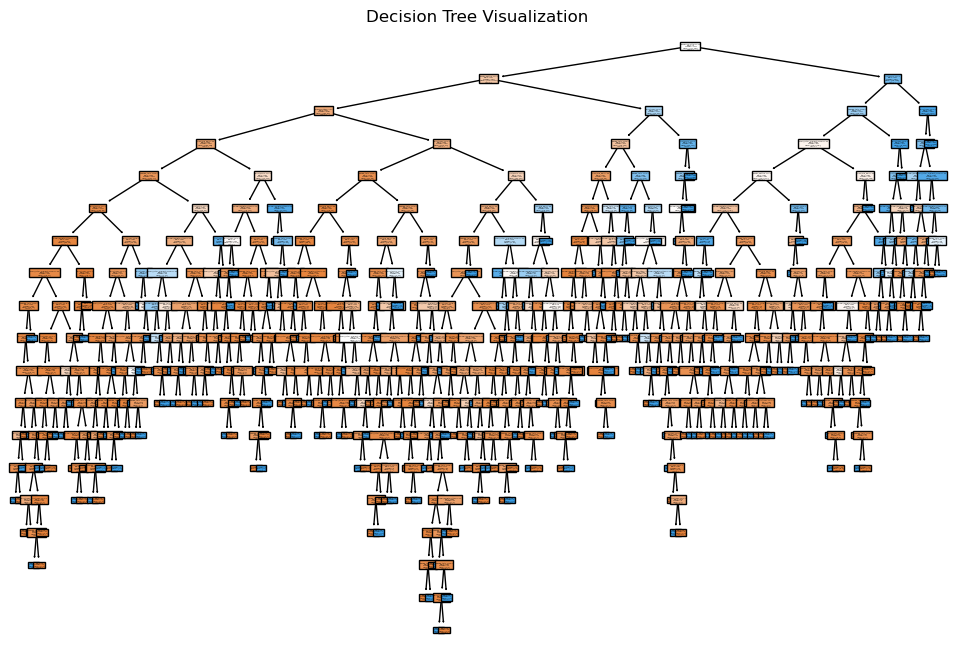


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       919
           1       1.00      0.97      0.99       933

    accuracy                           0.99      1852
   macro avg       0.99      0.99      0.99      1852
weighted avg       0.99      0.99      0.99      1852

Confusion Matrix:
[[919   0]
 [ 26 907]]
Accuracy for class 0: 1.0000
Accuracy for class 1: 0.9721


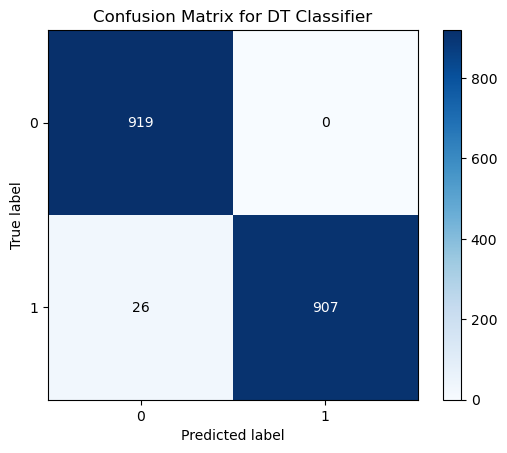

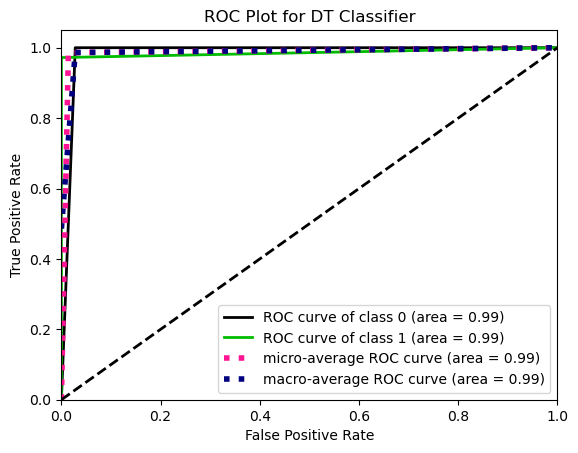

AUC: 0.99

Table of Results:
   Original y_test data  Original y_val data  Training data  Validation data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              1              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test data  Validation_error  Test_error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        1.0               0.0         0.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [5]:
# Decision Tree Classifier with RandomizedSearch hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt  # Make sure scikit-plot is ins

# Import the dataset
data_diagnosis2

# Independent (X) and dependent (y) variables
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': ['balanced', None]  # Weights associated with classes
}

# Create an instance of Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=10, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_dt_classifier = random_search.best_estimator_

# Perform Cross Validation on training set
k = 10
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_preddt = best_dt_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_preddt)
print("DT_Test Accuracy:", accuracy_test)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, 
          filled=True, 
          feature_names=data_diagnosis2.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()


# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_test_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val data').reset_index(drop=True)
training_data = pd.Series(best_dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_val data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('DT3_diagnosis result.csv', index=False)


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.9769    | 13.23     | 0.8576    | 2.808     | 6.359     | 269.5     |
| 2         | 0.9749    | 14.69     | 0.7188    | 3.675     | 9.709     | 253.4     |
| 3         | 0.9761    | 11.11     | 0.5738    | 1.599     | 3.971     | 233.8     |
| 4         | 0.9776    | 19.59     | 0.9952    | 2.908     | 3.225     | 226.1     |
| 5         | 0.9776    | 19.59     | 0.9968    | 2.91      | 3.227     | 226.1     |
| 6         | 0.9745    | 18.66     | 0.6484    | 3.179     | 4.214     | 217.7     |
| 7         | 0.98      | 19.29     | 0.5194    | 1.687     | 2.201     | 230.5     |
| 8         | 0.975     | 20.0      | 0.5       | 3.166     | 2.0       | 233.7     |
| 9         | 0.9799    | 19.09     | 0.5492    | 1.261     | 2.489     | 229.0     |
| 10        | 0.9799    | 16.9      | 0.5       | 1.0 

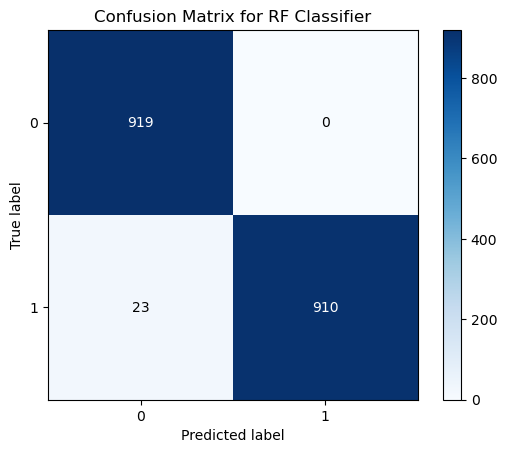

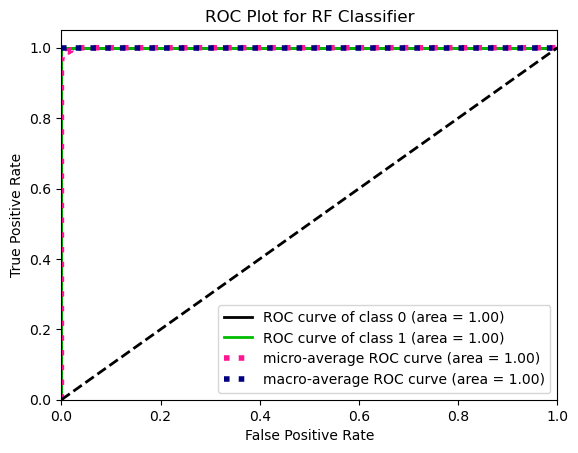

AUC: 1.00

Table of Results:
   Original y_test data  Original y_val data  Training data  Validation data  \
0                   0.0                  0.0              1              0.0   
1                   1.0                  0.0              1              0.0   
2                   1.0                  0.0              1              0.0   
3                   0.0                  1.0              0              1.0   
4                   1.0                  1.0              0              1.0   

   Test data  Validation_error  Test_error  
0        0.0               0.0         0.0  
1        1.0               0.0         0.0  
2        1.0               0.0         0.0  
3        0.0               0.0         0.0  
4        1.0               0.0         0.0  


In [9]:
# Random Forest Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt  # Make sure scikit-plot is installed
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler

# Importing the dataset
data_diagnosis2

# Assuming X contains your independent variables and y contains your dependent variable
X = data_diagnosis2.iloc[:, 0:9].values
y = data_diagnosis2.iloc[:, 9].values  # Tumor Type

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features,
        random_state=0
    )
    
    # Perform cross-validation (CV) on the training set
    cv_scores = cross_val_score(rf_classifier, X_trainval, y_trainval, scoring='accuracy', cv=5)
    
    # We minimize the negative cross-validation score because Bayesian Optimization minimizes functions
    return cv_scores.mean()

# Define the parameter bounds for the optimization process
param_bounds = {
    'n_estimators': (100, 500),           # Range for number of trees
    'max_depth': (5, 20),                 # Range for max depth
    'min_samples_split': (2, 10),         # Range for min samples split
    'min_samples_leaf': (1, 4),           # Range for min samples leaf
    'max_features': (0.5, 1.0)            # Fraction of features to consider at each split (between 50% and 100%)
}

# Set up the Bayesian Optimization instance
optimizer = BayesianOptimization(
    f=rf_cv,  # The function to optimize
    pbounds=param_bounds,  # The hyperparameter search space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbosity mode
)

# Run the optimization process
optimizer.maximize(
    init_points=2,  # Number of random steps before optimization
    n_iter=10  # Number of iterations of the optimization
)

# Print the best result found by Bayesian Optimization
print("Best Parameters Found by Bayesian Optimization:")
print(optimizer.max)

# Train the Random Forest with the best parameters found
best_params = optimizer.max['params']
best_rf_classifier = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0
)

best_rf_classifier.fit(X_trainval, y_trainval)

# Evaluate the model on validation set
y_pred_val = best_rf_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate and print the AUC score
from sklearn.metrics import roc_auc_score
auc_value = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC: {auc_value:.2f}")

# Extract results into a DataFrame
original_test_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
original_val_data = pd.Series(y_val, name='Original y_val data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_test_data, original_val_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_val data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']


print("\nTable of Results:")
print(results_table.head())

# Save the sampled data to a new CSV file (optional)
results_table.to_csv('RF3_diagnosis result.csv', index=False)


# Breast Cancer Diagnosis Prediction by predicting the Biospy, Tumor Size and Genetic Mutation

In [49]:
data = pd.read_csv('Modified_breast_cancer_diagnosis_data1___.csv')
data.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Tumor_Size_mm  Breast_Lump  Breast_Biopsy  Genetic_Mutation  \
0             50            0              0                 1   
1             77            1              0                 1   
2             54            0              0                 0   
3             54            1              0                 2   
4             97            1              1                 1   

   Diagnosis_Status  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1

In [50]:
data.iloc[:, 4].values

array([50, 77, 54, ..., 96, 97,  2], dtype=int64)

In [51]:
import numpy as np
import pandas as pd

# Load the data from your CSV file
data = pd.read_csv('Modified_breast_cancer_diagnosis_data1___.csv')

# Assuming the tumor size is in the 5th column (index 4)
tumor_size = data.iloc[:, 4].values  # size in mm

# Create a function to group tumor sizes into T1, T2, and T3
def group_tumor_size(tumor_size):
    if tumor_size <= 20:
        return 'T1'
    elif 20 < tumor_size <= 50:
        return 'T2'
    else:
        return 'T3'

# Apply the function to group tumor sizes and insert the new column right after 'Tumor_Size_mm'
data.insert(loc=data.columns.get_loc('Tumor_Size_mm') + 1, 
            column='Tumor_Size_Group', 
            value=data['Tumor_Size_mm'].apply(group_tumor_size))

# Save the updated dataset to a new CSV file (optional)
output_file = 'Modified_breast_cancer_diagnosis_data1 with_tumor groups.csv'
data.to_csv(output_file, index=False)

# Display the first few rows of the updated dataset
data.head()





Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Tumor_Size_mm Tumor_Size_Group  Breast_Lump  Breast_Biopsy  \
0             50               T2            0              0   
1             77               T3            1              0   
2             54               T3            0              0   
3             54               T3            1              0   
4             97               T3            1              1   

   Genetic_Mutation  Diagnosis_Status  
0                 1                 1  
1                 1                 1  
2                 0                 1  
3                 2                 1  
4                 1                 1

In [52]:
import pandas as pd

# Load the data from your CSV file
data 

# Reorder the columns based on the specified order
new_column_order = [
    'Age', 
    'Smoking_Status', 
    'Family_History_of_Breast_Cancer', 
    'Menopausal_Status', 
    'Breast_Lump', 
    'Breast_Biopsy', 
    'Tumor_Size_Group', 
    'Genetic_Mutation',
    'Tumor_Size_mm',
    'Diagnosis_Status'
]

# Reassign the DataFrame with the new column order
data = data[new_column_order]

# Save the reordered DataFrame to a new CSV file (optional)
output_file = 'Modified_breast_cancer_diagnosis_data1 with_tumor groups.csv'
data.to_csv(output_file, index=False)

# Display the first few rows of the updated dataset
data.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Breast_Lump  Breast_Biopsy Tumor_Size_Group  Genetic_Mutation  \
0            0              0               T2                 1   
1            1              0               T3                 1   
2            0              0               T3                 0   
3            1              0               T3                 2   
4            1              1               T3                 1   

   Tumor_Size_mm  Diagnosis_Status  
0             50                 1  
1             77                 1  
2             54                 1  
3             54                 1  
4             97                 1

# Breast Cancer Diagnosis Prediction by predicting the Breast Biospy

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.5044    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.5118    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.5029    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.5044    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.4929    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.5052    | 0.7509    | 0.1663    | 4.658     | 4.376     | 430.6     | 0.6383    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.4978    | 0.813     | 0.03474   | 9.194     | 5.177     | 416.3     | 0.6386    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.5       | 0.9675    | 0.3       | 9.938     | 4.643     | 416.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.4917    | 0.8494    | 0.03289   | 8.07      | 9.863     | 453.4     | 0.885     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.502     | 0.8769    | 0.03248   | 4.905     | 6.402     | 387.6     | 0.771     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.5017    | 0.8082    | 0.06271   | 8.815     | 6.626     | 332.1     | 0.7609    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.5066    | 0.9589    | 0.2069    | 5.89      | 5.266     | 413.1     | 0.7571    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.4958    | 0.9116    | 0.07955   | 5.417     | 7.384     | 444.8     | 0.6642    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.5074    | 0.906     | 0.03531   | 5.68      | 2.525     | 144.6     | 0.8146    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.5105    | 0.7681    | 0.1392    | 5.948     | 4.654     | 443.9     | 0.7825    |
Best Hyperparameters found by Bayesian Optimization: {'colsample_bytree': 0.775034884505077, 'learning_rate': 0.2686141702268031, 'max_depth': 9.745639323507206, 'min_child_weight': 4.450973669431999, 'n_estimators': 416.6900152330658, 'subsample': 0.8115579679011617}


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:19:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.52696078 0.49509804 0.5        0.52941176 0.46568627 0.5
 0.4754902  0.5245098  0.4963145  0.5036855 ]
Average CV Score: 0.5017156862745098
Standard Deviation: 0.01998146097743278
Validation Accuracy with Best Model: 0.6833333333333333
Test Accuracy with Best Model: 0.4950980392156863

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.48      0.53      0.50       491
           1       0.51      0.47      0.49       529

    accuracy                           0.50      1020
   macro avg       0.50      0.50      0.50      1020
weighted avg       0.50      0.50      0.49      1020

Confusion Matrix:
[[259 232]
 [283 246]]
Accuracy for class 0: 0.5275
Accuracy for class 1: 0.4650


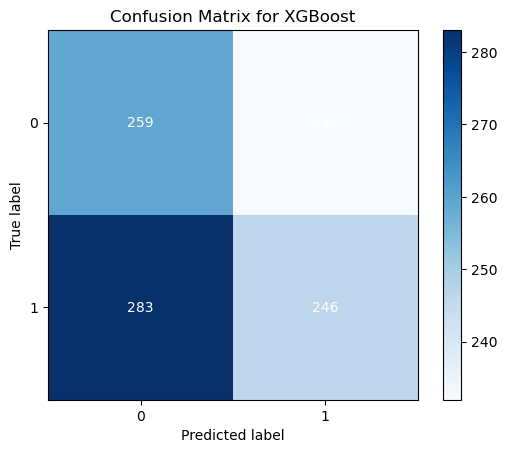

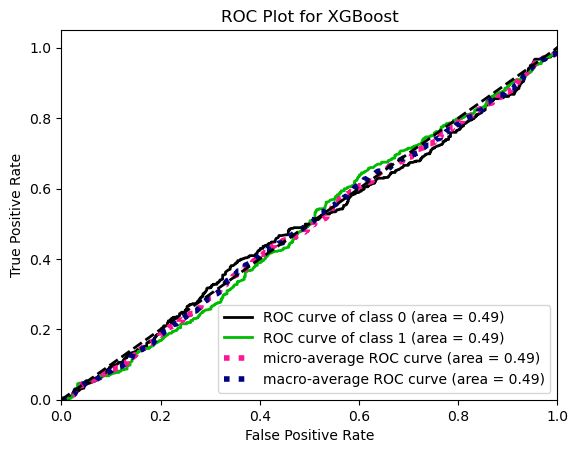

ValueError: y should be a 1d array, got an array of shape (1020, 2) instead.

In [53]:
# XGBoost Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Import the dataset
data

# Independent (X) and dependent (y) variables
X = data.iloc[:, 0:5].values
y = data.iloc[:, 5].values  # Biospy
# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    """Function to be optimized by Bayesian Optimization"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_trainval, y_trainval, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Create a BayesianOptimizer instance
optimizer = BayesianOptimization(
    f=xgb_cv,  # The function to optimize
    pbounds=param_bounds,  # Hyperparameter space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbose output during optimization
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=10)  # 5 random steps, followed by 10 optimization steps

# Retrieve the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters found by Bayesian Optimization:", best_params)

# Train the model with the best parameters found
best_xgb_classifier = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

best_xgb_classifier.fit(X_trainval, y_trainval)

# Perform Cross Validation on the training set
cv_scores = cross_val_score(best_xgb_classifier, X_trainval, y_trainval, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Make predictions on the validation set using the best model
y_pred_val = best_xgb_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_xgb_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_xgb_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()



|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.4956    | 13.23     | 0.8576    | 2.808     | 6.359     | 269.5     |
| 2         | 0.4926    | 14.69     | 0.7188    | 3.675     | 9.709     | 253.4     |
| 3         | 0.4939    | 11.11     | 0.5738    | 1.599     | 3.971     | 233.8     |
| 4         | 0.4953    | 19.59     | 0.9952    | 2.908     | 3.225     | 226.1     |
| 5         | 0.4956    | 13.23     | 0.8597    | 2.81      | 6.361     | 269.5     |
| 6         | 0.4951    | 10.18     | 0.8261    | 1.065     | 5.865     | 276.6     |
| 7         | 0.4892    | 19.92     | 0.7057    | 3.597     | 2.438     | 274.3     |
| 8         | 0.5017    | 8.656     | 1.0       | 1.99      | 9.191     | 271.0     |
| 9         | 0.5015    | 5.587     | 0.9384    | 2.531     | 10.0      | 269.7     |
| 10        | 0.5074    | 7.94      | 1.0       | 1.0 

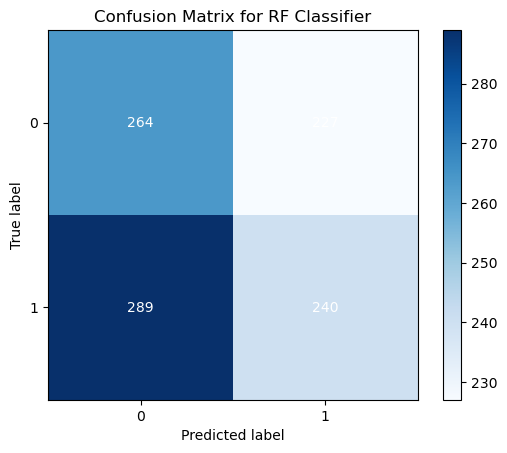

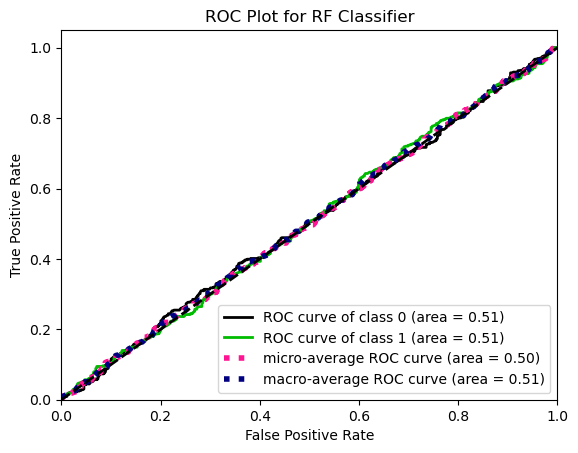

AUC: 0.51

Table of Results:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              1              0.0        1.0   
1                   0.0              1              1.0        1.0   
2                   0.0              1              0.0        0.0   
3                   1.0              0              0.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0             0.0              -1.0         0.0  
1             1.0               1.0         1.0  
2             1.0               0.0         0.0  
3            -1.0              -1.0        -1.0  
4            -1.0               0.0         0.0  


In [54]:
# Random Forest Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt  # Make sure scikit-plot is installed
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

# Import the dataset
data

# Independent (X) and dependent (y) variables
X = data.iloc[:, 0:5].values
y = data.iloc[:, 5].values  # Biospy

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features,
        random_state=0
    )
    
    # Perform cross-validation (CV) on the training set
    cv_scores = cross_val_score(rf_classifier, X_trainval, y_trainval, scoring='accuracy', cv=5)
    
    # We minimize the negative cross-validation score because Bayesian Optimization minimizes functions
    return cv_scores.mean()

# Define the parameter bounds for the optimization process
param_bounds = {
    'n_estimators': (100, 500),           # Range for number of trees
    'max_depth': (5, 20),                 # Range for max depth
    'min_samples_split': (2, 10),         # Range for min samples split
    'min_samples_leaf': (1, 4),           # Range for min samples leaf
    'max_features': (0.5, 1.0)            # Fraction of features to consider at each split (between 50% and 100%)
}

# Set up the Bayesian Optimization instance
optimizer = BayesianOptimization(
    f=rf_cv,  # The function to optimize
    pbounds=param_bounds,  # The hyperparameter search space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbosity mode
)

# Run the optimization process
optimizer.maximize(
    init_points=2,  # Number of random steps before optimization
    n_iter=10  # Number of iterations of the optimization
)

# Print the best result found by Bayesian Optimization
print("Best Parameters Found by Bayesian Optimization:")
print(optimizer.max)

# Train the Random Forest with the best parameters found
best_params = optimizer.max['params']
best_rf_classifier = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0
)

best_rf_classifier.fit(X_trainval, y_trainval)

# Evaluate the model on validation set
y_pred_val = best_rf_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate and print the AUC score
from sklearn.metrics import roc_auc_score
auc_value = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC: {auc_value:.2f}")

# Extract results into a DataFrame
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


Cross Validation Scores: [0.53186275 0.48039216 0.52205882 0.52696078 0.49509804 0.5
 0.5        0.53431373 0.44717445 0.48402948]
Average CV Score: 0.5021890205713735
Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkowski, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END metric=minkow

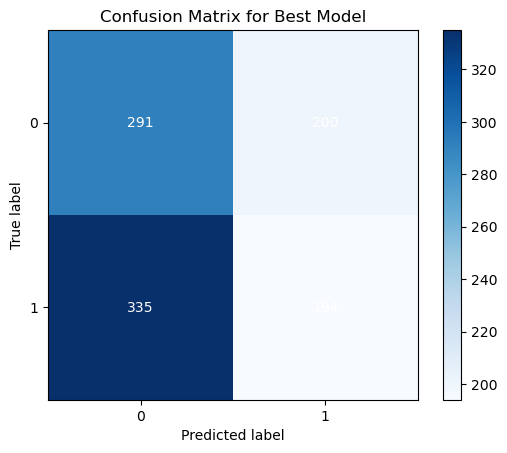

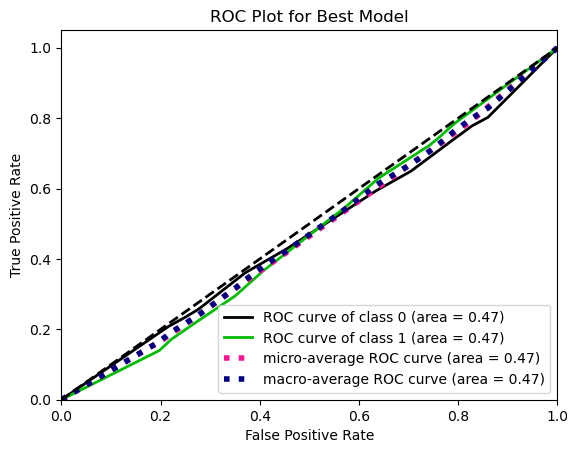

AUC with Best Model: 0.48

Table of Results with Best Model:
   Original y_test data  Training data  Validation data  Test data  \
0                   1.0              0              0.0        0.0   
1                   0.0              0              0.0        1.0   
2                   0.0              1              0.0        0.0   
3                   1.0              1              1.0        0.0   
4                   1.0              0              1.0        1.0   

   Training_error  Validation_error  Test_error  
0            -1.0              -1.0        -1.0  
1             0.0               0.0         1.0  
2             1.0               0.0         0.0  
3             0.0               0.0        -1.0  
4            -1.0               0.0         0.0  


In [55]:
# KNN Classifier with GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn import metrics

# Import the dataset
data

# Independent (X) and dependent (y) variables
X = data.iloc[:, 0:5].values
y = data.iloc[:, 5].values  # Biospy

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)


# Fitting KNN to the Training Set
knn_classifier = KNeighborsClassifier(n_neighbors=7, weights='distance', metric='minkowski', p=2, n_jobs=-1)
knn_classifier.fit(X_train, y_train)

# Perform Cross Validation on training set
k = 10
cv_scores = cross_val_score(knn_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

# Define parameter grid for GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan'],
    'p': [1, 2] # The power parameter for the Minkowski metric
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=10, scoring='accuracy', verbose=2)

# Perform Grid Search on training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross Validation Score: {grid_search.best_score_:.4f}")


# Make predictions on validation set using the best model
y_pred_val = best_model.predict(X_val)

# Evaluate the best model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on test set using the best model
y_pred_test = best_model.predict(X_test)

# Evaluate the best model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nKNN Classifier with Best Model:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for Best Model')
plt.show()

# Plot ROC Curve
y_pred_proba = best_model.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for Best Model')
plt.show()

# Calculate AUC Score for best model
auc_value = roc_auc_score(y_test, y_pred_test, multi_class='ovr')
print(f"AUC with Best Model: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_model.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_pred_test, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results with Best Model:")
print(results_table.head())


In [83]:
data = pd.read_csv('Modified_breast_cancer_diagnosis_data1 with_tumor groups.csv')
data.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Breast_Lump  Breast_Biopsy Tumor_Size_Group  Genetic_Mutation  \
0            0              0               T2                 1   
1            1              0               T3                 1   
2            0              0               T3                 0   
3            1              0               T3                 2   
4            1              1               T3                 1   

   Tumor_Size_mm  Diagnosis_Status  
0             50                 1  
1             77                 1  
2             54                 1  
3             54                 1  
4             97                 1

In [84]:
data.Tumor_Size_Group.unique()

array(['T2', 'T3', 'T1'], dtype=object)

In [87]:
data.Tumor_Size_Group.unique()

array([1, 2, 0])

In [86]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Hormone_Receptor_Status" column
data['Tumor_Size_Group'] = label_encoder.fit_transform(data['Tumor_Size_Group'])
data.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
0   71               0                                0                  0   
1   34               0                                1                  1   
2   80               0                                0                  1   
3   40               1                                1                  0   
4   43               1                                0                  1   

   Breast_Lump  Breast_Biopsy  Tumor_Size_Group  Genetic_Mutation  \
0            0              0                 1                 1   
1            1              0                 2                 1   
2            0              0                 2                 0   
3            1              0                 2                 2   
4            1              1                 2                 1   

   Tumor_Size_mm  Diagnosis_Status  
0             50                 1  
1             77                 1  
2             54                 1  
3             54                 1  
4             97                 1

In [88]:
# Save the updated dataset to a new CSV file (optional)
output_file = 'Modified_numerical_breast_cancer_diagnosis_data1 with_tumor groups.csv'
data.to_csv(output_file, index=False)


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:19:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.4703    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.509     | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.3916    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.4982    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.406     | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.4803    | 1.0       | 0.2472    | 5.362     | 1.306     | 426.1     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:20:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.5066    | 0.9775    | 0.1523    | 9.912     | 5.466     | 416.0     | 0.7669    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.404     | 0.6       | 0.3       | 3.0       | 1.0       | 400.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.471     | 0.8559    | 0.04804   | 10.0      | 10.0      | 449.0     | 0.9167    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.4688    | 0.6       | 0.3       | 10.0      | 10.0      | 425.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.4882    | 0.7226    | 0.08767   | 8.104     | 2.49      | 469.6     | 0.8007    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.4019    | 0.9254    | 0.06261   | 3.063     | 9.5       | 482.9     | 0.7197    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.4098    | 0.7216    | 0.3       | 3.0       | 1.0       | 458.7     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.4019    | 0.6       | 0.3       | 3.0       | 5.94      | 417.6     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:22:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.4765    | 1.0       | 0.01      | 10.0      | 2.302     | 413.4     | 1.0       |
Best Hyperparameters found by Bayesian Optimization: {'colsample_bytree': 0.775034884505077, 'learning_rate': 0.2686141702268031, 'max_depth': 9.745639323507206, 'min_child_weight': 4.450973669431999, 'n_estimators': 416.6900152330658, 'subsample': 0.8115579679011617}


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:23:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.49180328 0.50491803 0.50491803 0.52295082 0.51803279 0.45901639
 0.53366174 0.53694581 0.5270936  0.4909688 ]
Average CV Score: 0.5090309295001212
Standard Deviation: 0.022683236868620317
Validation Accuracy with Best Model: 0.7171916010498688
Test Accuracy with Best Model: 0.536745406824147

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.57      0.66      0.61       516
           1       0.54      0.50      0.52       512
           2       0.49      0.44      0.46       496

    accuracy                           0.54      1524
   macro avg       0.53      0.54      0.53      1524
weighted avg       0.53      0.54      0.53      1524

Confusion Matrix:
[[343  81  92]
 [121 258 133]
 [141 138 217]]
Accuracy for class 0: 0.6647
Accuracy for class 1: 0.5039
Accuracy for class 2: 0.4375


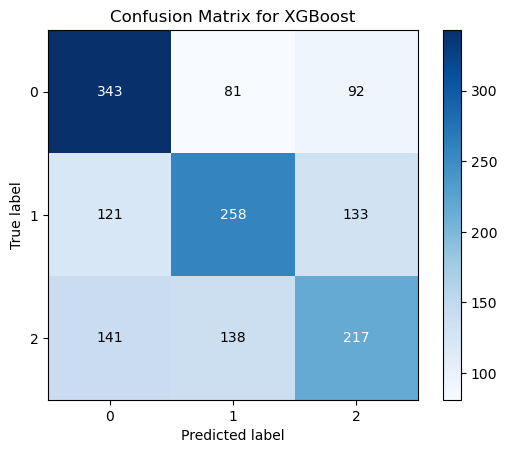

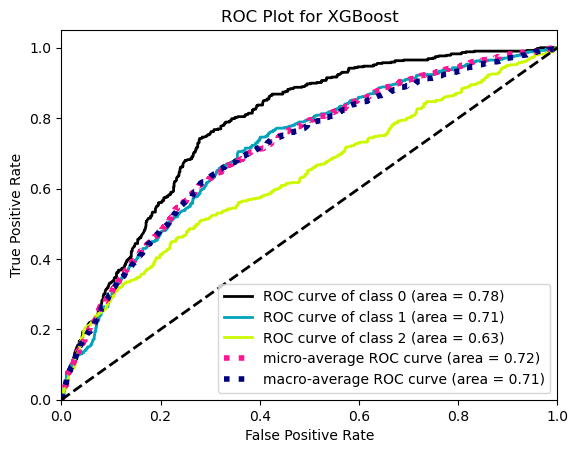

In [62]:
# XGBoost Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Import the dataset
data

# Independent (X) and dependent (y) variables
X = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values  # Biospy
# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    """Function to be optimized by Bayesian Optimization"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_trainval, y_trainval, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Create a BayesianOptimizer instance
optimizer = BayesianOptimization(
    f=xgb_cv,  # The function to optimize
    pbounds=param_bounds,  # Hyperparameter space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbose output during optimization
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=10)  # 5 random steps, followed by 10 optimization steps

# Retrieve the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters found by Bayesian Optimization:", best_params)

# Train the model with the best parameters found
best_xgb_classifier = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

best_xgb_classifier.fit(X_trainval, y_trainval)

# Perform Cross Validation on the training set
cv_scores = cross_val_score(best_xgb_classifier, X_trainval, y_trainval, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Make predictions on the validation set using the best model
y_pred_val = best_xgb_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_xgb_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_xgb_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()



# Reduction of the dataset Size to 2000

In [67]:
import pandas as pd

# Load your dataset
data

# Randomly sample 2000 rows from the 5000
sampled_data = data.sample(n=1000, random_state=42)

# Save the sampled data to a new CSV file (optional)
sampled_data.to_csv('Reduced_Modified_breast_cancer_diagnosis_data1 with_tumor groups.csv', index=False)

# Display the first few rows of the reduced dataset
sampled_data.head()


Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
1501   85               0                                1                  0   
2586   31               0                                0                  0   
2653   63               0                                1                  1   
1055   64               1                                1                  1   
705    87               1                                1                  1   

      Breast_Lump  Breast_Biopsy  Tumor_Size_Group  Genetic_Mutation  \
1501            1              1                 2                 2   
2586            0              0                 2                 0   
2653            1              1                 0                 2   
1055            1              1                 1                 0   
705             0              1                 1                 1   

      Tumor_Size_mm  Diagnosis_Status  
1501             97                 1  
2586             97                 0  
2653             12                 1  
1055             21                 1  
705              26                 1

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.4854    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.4975    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.4988    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.4926    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.5084    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.5036    | 0.6       | 0.1842    | 3.0       | 10.0      | 323.5     | 0.6595    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.5012    | 0.7218    | 0.1713    | 4.739     | 8.766     | 308.6     | 0.7904    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.5085    | 0.6413    | 0.2793    | 3.102     | 9.864     | 308.3     | 0.7879    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.5024    | 0.6       | 0.117     | 3.0       | 10.0      | 310.3     | 0.6191    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.5072    | 0.6       | 0.01      | 3.942     | 10.0      | 306.6     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:18:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.4963    | 1.0       | 0.3       | 3.0       | 10.0      | 304.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.4975    | 0.7104    | 0.181     | 3.572     | 8.064     | 321.4     | 0.7263    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.4793    | 0.8657    | 0.0761    | 3.187     | 10.0      | 326.2     | 0.8046    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.4999    | 0.6       | 0.01      | 3.0       | 8.39      | 307.2     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.506     | 0.6       | 0.01      | 5.975     | 10.0      | 306.6     | 0.6       |
Best Hyperparameters found by Bayesian Optimization: {'colsample_bytree': 0.6413416458140172, 'learning_rate': 0.27930226153101156, 'max_depth': 3.1020681927714517, 'min_child_weight': 9.864173982563479, 'n_estimators': 308.31854654557765, 'subsample': 0.7878568959291284}


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.62650602 0.53012048 0.51807229 0.44578313 0.5        0.41463415
 0.59756098 0.52439024 0.43902439 0.58536585]
Average CV Score: 0.5181457537466941
Standard Deviation: 0.067297935342669
Validation Accuracy with Best Model: 0.6941747572815534
Test Accuracy with Best Model: 0.49514563106796117

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.47      0.52      0.50        98
           1       0.52      0.47      0.50       108

    accuracy                           0.50       206
   macro avg       0.50      0.50      0.50       206
weighted avg       0.50      0.50      0.50       206

Confusion Matrix:
[[51 47]
 [57 51]]
Accuracy for class 0: 0.5204
Accuracy for class 1: 0.4722


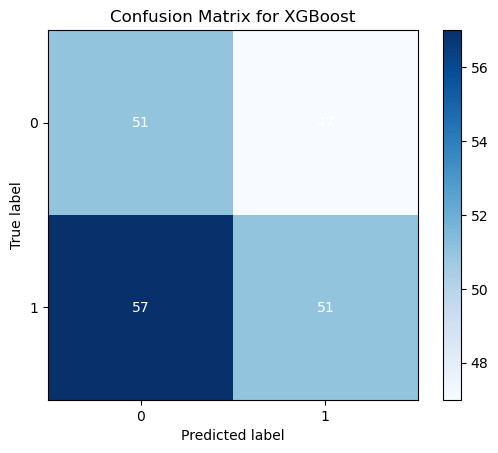

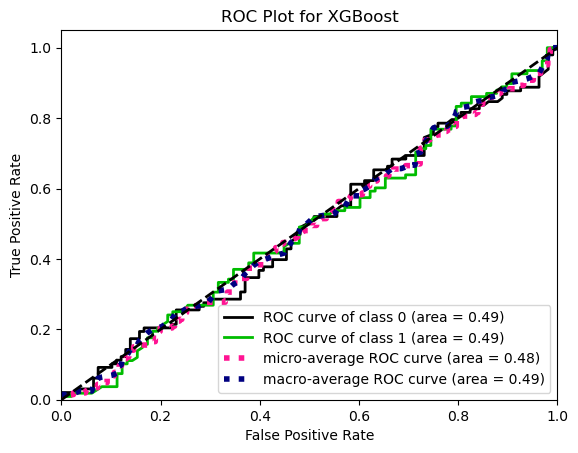

In [68]:
# XGBoost Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Import the dataset
sampled_data

# Independent (X) and dependent (y) variables
X = sampled_data.iloc[:, 0:5].values
y = sampled_data.iloc[:, 5].values  # Biospy

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    """Function to be optimized by Bayesian Optimization"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_trainval, y_trainval, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Create a BayesianOptimizer instance
optimizer = BayesianOptimization(
    f=xgb_cv,  # The function to optimize
    pbounds=param_bounds,  # Hyperparameter space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbose output during optimization
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=10)  # 5 random steps, followed by 10 optimization steps

# Retrieve the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters found by Bayesian Optimization:", best_params)

# Train the model with the best parameters found
best_xgb_classifier = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

best_xgb_classifier.fit(X_trainval, y_trainval)

# Perform Cross Validation on the training set
cv_scores = cross_val_score(best_xgb_classifier, X_trainval, y_trainval, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Make predictions on the validation set using the best model
y_pred_val = best_xgb_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_xgb_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_xgb_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()



# Tumor Size Classification

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini', 'class_weight': None}
Cross Validation Scores: [0.59677419 0.65322581 0.62096774 0.67741935 0.58870968 0.62096774
 0.69354839 0.64516129 0.58536585 0.60162602]
Average CV Score: 0.6283766063467087
Validation Accuracy: 0.9096774193548387
DT_Test Accuracy: 0.6967741935483871


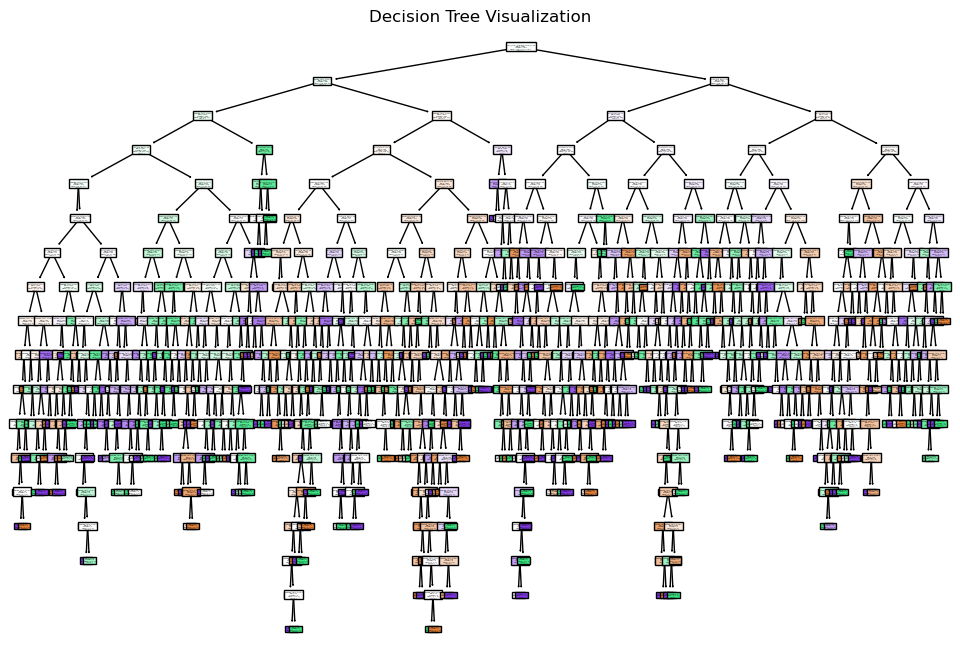


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83       117
           1       0.59      0.74      0.66        85
           2       0.75      0.41      0.53       108

    accuracy                           0.70       310
   macro avg       0.70      0.69      0.67       310
weighted avg       0.71      0.70      0.68       310

Confusion Matrix:
[[109   2   6]
 [ 13  63   9]
 [ 23  41  44]]
Accuracy for class 0: 0.9316
Accuracy for class 1: 0.7412
Accuracy for class 2: 0.4074


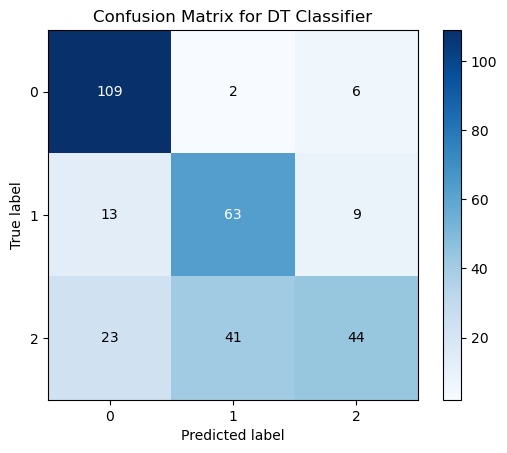

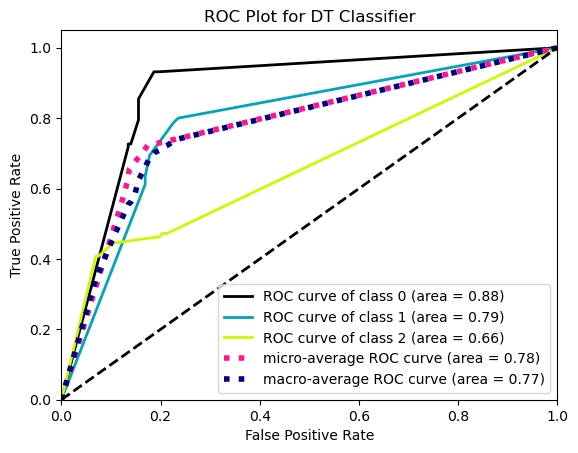

AxisError: axis 1 is out of bounds for array of dimension 1

In [71]:
# Decision Tree Classifier with RandomizedSearch hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# Import the dataset
sampled_data

# Independent (X) and dependent (y) variables
X = sampled_data.iloc[:, 0:6].values
y = sampled_data.iloc[:, 6].values  # Tumor Size

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'class_weight': ['balanced', None]  # Weights associated with classes
}

# Create an instance of Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=0)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_grid, n_iter=50,
                                   scoring='accuracy', cv=10, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_trainval, y_trainval)

# Print the best parameters found
print("Best Parameters:", random_search.best_params_)
best_dt_classifier = random_search.best_estimator_

# Perform Cross Validation on training set
k = 10
scores = cross_val_score(dt_classifier, X_trainval, y_trainval, cv=k)
print("Cross Validation Scores:", scores)
print("Average CV Score:", scores.mean())

# Use the best model to make predictions on the validation set
y_pred_val = best_dt_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on test set
y_preddt = best_dt_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_preddt)
print("DT_Test Accuracy:", accuracy_test)

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(best_dt_classifier, 
          filled=True, 
          feature_names=sampled_data.columns[1:14].tolist(),  # Use the column names from the DataFrame
          class_names=list(np.unique(y).astype(str)))
plt.title("Decision Tree Visualization")
plt.show()


# Print Classification Report and Confusion Matrix
print("\nDecision Tree Classifier:")
print(classification_report(y_test, y_preddt))
cm = confusion_matrix(y_test, y_preddt)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")
# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_preddt, normalize=False, title='Confusion Matrix for DT Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for DT Classifier')
plt.show()

# Calculate AUC Score
from sklearn.metrics import roc_auc_score, roc_curve, auc
y_pred_proba = best_dt_classifier.predict_proba(X_test) # Predict probabilities
auc_value = roc_auc_score(y_test, y_preddt, multi_class='ovr')
print(f"AUC: {auc_value:.2f}")

# Convert arrays to Series and reset indices
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_dt_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_preddt, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.5331    | 13.23     | 0.8576    | 2.808     | 6.359     | 269.5     |
| 2         | 0.5153    | 14.69     | 0.7188    | 3.675     | 9.709     | 253.4     |
| 3         | 0.5896    | 11.11     | 0.5738    | 1.599     | 3.971     | 233.8     |
| 4         | 0.5477    | 11.21     | 0.8494    | 2.324     | 3.81      | 232.5     |
| 5         | 0.5888    | 11.35     | 0.501     | 1.79      | 3.917     | 234.3     |
| 6         | 0.546     | 9.958     | 0.5       | 1.0       | 4.553     | 234.9     |
| 7         | 0.5937    | 12.17     | 0.5       | 1.0       | 3.943     | 233.9     |
| 8         | 0.6018    | 11.65     | 0.5       | 1.0       | 2.414     | 234.2     |
| 9         | 0.5994    | 13.25     | 1.0       | 1.0       | 2.16      | 235.0     |
| 10        | 0.601     | 12.01     | 0.5       | 1.0 

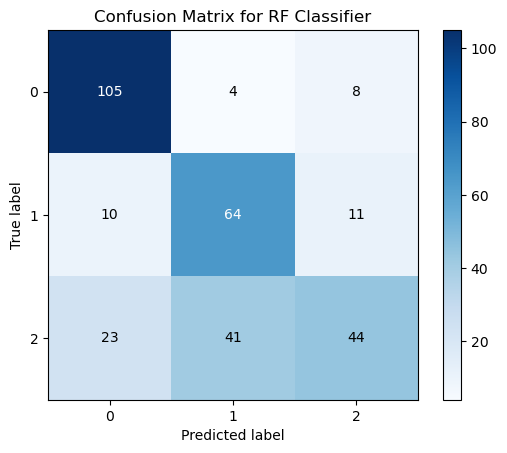

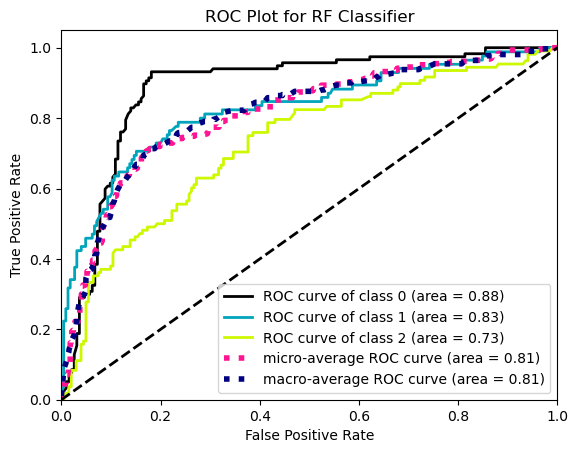

ValueError: multi_class must be in ('ovo', 'ovr')

In [70]:
# Random Forest Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt  # Make sure scikit-plot is installed
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt

# Import the dataset
sampled_data

# Independent (X) and dependent (y) variables
X = sampled_data.iloc[:, 0:6].values
y = sampled_data.iloc[:, 6].values  # Tumor Size

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    rf_classifier = RandomForestClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        max_features=max_features,
        random_state=0
    )
    
    # Perform cross-validation (CV) on the training set
    cv_scores = cross_val_score(rf_classifier, X_trainval, y_trainval, scoring='accuracy', cv=5)
    
    # We minimize the negative cross-validation score because Bayesian Optimization minimizes functions
    return cv_scores.mean()

# Define the parameter bounds for the optimization process
param_bounds = {
    'n_estimators': (100, 500),           # Range for number of trees
    'max_depth': (5, 20),                 # Range for max depth
    'min_samples_split': (2, 10),         # Range for min samples split
    'min_samples_leaf': (1, 4),           # Range for min samples leaf
    'max_features': (0.5, 1.0)            # Fraction of features to consider at each split (between 50% and 100%)
}

# Set up the Bayesian Optimization instance
optimizer = BayesianOptimization(
    f=rf_cv,  # The function to optimize
    pbounds=param_bounds,  # The hyperparameter search space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbosity mode
)

# Run the optimization process
optimizer.maximize(
    init_points=2,  # Number of random steps before optimization
    n_iter=10  # Number of iterations of the optimization
)

# Print the best result found by Bayesian Optimization
print("Best Parameters Found by Bayesian Optimization:")
print(optimizer.max)

# Train the Random Forest with the best parameters found
best_params = optimizer.max['params']
best_rf_classifier = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0
)

best_rf_classifier.fit(X_trainval, y_trainval)

# Evaluate the model on validation set
y_pred_val = best_rf_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

# Make predictions on the test set
y_predrf = best_rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_predrf)
print("Test Accuracy:", accuracy_test)

# Print Classification Report and Confusion Matrix
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_predrf))
cm = confusion_matrix(y_test, y_predrf)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_predrf, normalize=False, title='Confusion Matrix for RF Classifier')
plt.show()

# Plot ROC Curve
y_pred_proba = best_rf_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for RF Classifier')
plt.show()

# Calculate and print the AUC score
from sklearn.metrics import roc_auc_score
auc_value = roc_auc_score(y_test, y_pred_proba[:, 1])
print(f"AUC: {auc_value:.2f}")

# Extract results into a DataFrame
original_data = pd.Series(y_test, name='Original y_test data').reset_index(drop=True)
training_data = pd.Series(best_rf_classifier.predict(X_train), name='Training data').reset_index(drop=True)
validation_data = pd.Series(y_pred_val, name='Validation data').reset_index(drop=True)
test_data = pd.Series(y_predrf, name='Test data').reset_index(drop=True)

# Create DataFrame
results_table = pd.concat([original_data, training_data, validation_data, test_data], axis=1)

# Calculate errors
results_table['Training_error'] = results_table['Training data'] - results_table['Original y_test data']
results_table['Validation_error'] = results_table['Validation data'] - results_table['Original y_test data']
results_table['Test_error'] = results_table['Test data'] - results_table['Original y_test data']

print("\nTable of Results:")
print(results_table.head())


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.5597    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:19:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.5945    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.4459    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.563     | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.4588    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.605     | 0.9739    | 0.3       | 10.0      | 1.0       | 435.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.5929    | 0.9041    | 0.1523    | 8.999     | 1.541     | 435.9     | 0.7294    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.5994    | 1.0       | 0.3       | 10.0      | 1.0       | 426.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:21:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.5905    | 1.0       | 0.3       | 10.0      | 1.0       | 397.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.3966    | 0.6803    | 0.01      | 3.0       | 10.0      | 379.3     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.5961    | 1.0       | 0.3       | 10.0      | 1.0       | 462.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.5993    | 1.0       | 0.3       | 10.0      | 2.682     | 481.7     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.4846    | 0.9532    | 0.3       | 3.0       | 10.0      | 500.0     | 0.9164    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.3813    | 0.6       | 0.01      | 3.0       | 10.0      | 471.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.6042    | 0.9106    | 0.1346    | 6.584     | 1.0       | 407.0     | 0.859     |
Best Hyperparameters found by Bayesian Optimization: {'colsample_bytree': 0.9739218708570817, 'learning_rate': 0.3, 'max_depth': 10.0, 'min_child_weight': 1.0, 'n_estimators': 435.43338700162775, 'subsample': 1.0}


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:23:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

Cross Validation Scores: [0.61290323 0.60483871 0.62903226 0.64516129 0.62096774 0.63709677
 0.66129032 0.64516129 0.5203252  0.64227642]
Average CV Score: 0.6219053238919486
Standard Deviation: 0.037444786223208314
Validation Accuracy with Best Model: 0.9161290322580645
Test Accuracy with Best Model: 0.6451612903225806

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       117
           1       0.60      0.72      0.65        85
           2       0.60      0.37      0.46       108

    accuracy                           0.65       310
   macro avg       0.63      0.64      0.63       310
weighted avg       0.64      0.65      0.63       310

Confusion Matrix:
[[99  6 12]
 [ 9 61 15]
 [33 35 40]]
Accuracy for class 0: 0.8462
Accuracy for class 1: 0.7176
Accuracy for class 2: 0.3704


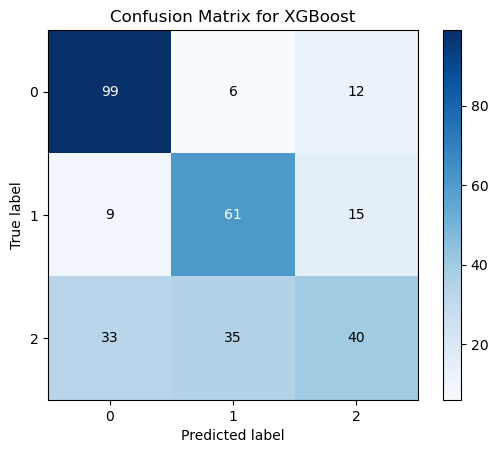

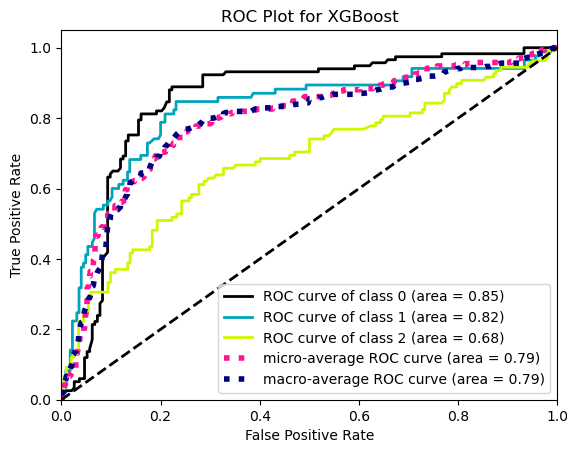

In [69]:
# XGBoost Classifier with Bayesian Optimization for Hyperparameter Tuning
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization

# Import the dataset
sampled_data

# Independent (X) and dependent (y) variables
X = sampled_data.iloc[:, 0:6].values
y = sampled_data.iloc[:, 6].values  # Tumor Size

# Resample the training data
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the data into training, validation, and testing sets
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    """Function to be optimized by Bayesian Optimization"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_trainval, y_trainval, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Create a BayesianOptimizer instance
optimizer = BayesianOptimization(
    f=xgb_cv,  # The function to optimize
    pbounds=param_bounds,  # Hyperparameter space
    random_state=0,  # Ensures reproducibility
    verbose=2  # Verbose output during optimization
)

# Run the optimization
optimizer.maximize(init_points=5, n_iter=10)  # 5 random steps, followed by 10 optimization steps

# Retrieve the best hyperparameters
best_params = optimizer.max['params']
print("Best Hyperparameters found by Bayesian Optimization:", best_params)

# Train the model with the best parameters found
best_xgb_classifier = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=0
)

best_xgb_classifier.fit(X_trainval, y_trainval)

# Perform Cross Validation on the training set
cv_scores = cross_val_score(best_xgb_classifier, X_trainval, y_trainval, cv=10)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

# Make predictions on the validation set using the best model
y_pred_val = best_xgb_classifier.predict(X_val)

# Evaluate the model on validation set
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy with Best Model:", accuracy_val)

# Make predictions on the test set
y_pred_test = best_xgb_classifier.predict(X_test)

# Evaluate the model on test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy with Best Model:", accuracy_test)

# Print Classification Report and Confusion Matrix for test set
print("\nXGBoost Classifier:")
print(classification_report(y_test, y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(cm)
per_class_accuracies = cm.diagonal() / cm.sum(axis=1)
for cls, acc in enumerate(per_class_accuracies):
    print(f"Accuracy for class {cls}: {acc:.4f}")

# Visualize the Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False, title='Confusion Matrix for XGBoost')
plt.show()

# Visualize the ROC Curve
y_pred_proba = best_xgb_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pred_proba, title='ROC Plot for XGBoost')
plt.show()



In [80]:
sampled_data.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
1501   85               0                                1                  0   
2586   31               0                                0                  0   
2653   63               0                                1                  1   
1055   64               1                                1                  1   
705    87               1                                1                  1   

      Breast_Lump  Breast_Biopsy  Tumor_Size_Group  Genetic_Mutation  \
1501            1              1                 2                 2   
2586            0              0                 2                 0   
2653            1              1                 0                 2   
1055            1              1                 1                 0   
705             0              1                 1                 1   

      Tumor_Size_mm  Diagnosis_Status  
1501             97                 1  
2586             97                 0  
2653             12                 1  
1055             21                 1  
705              26                 1

In [82]:
# Save the reordered DataFrame to a new CSV file (optional)
output_file = 'Modified_sampled_breast_cancer_diagnosis_data.csv'
sampled_data.to_csv(output_file, index=False)

# Display the first few rows of the updated dataset
sampled_data.head()

Age  Smoking_Status  Family_History_of_Breast_Cancer  Menopausal_Status  \
1501   85               0                                1                  0   
2586   31               0                                0                  0   
2653   63               0                                1                  1   
1055   64               1                                1                  1   
705    87               1                                1                  1   

      Breast_Lump  Breast_Biopsy  Tumor_Size_Group  Genetic_Mutation  \
1501            1              1                 2                 2   
2586            0              0                 2                 0   
2653            1              1                 0                 2   
1055            1              1                 1                 0   
705             0              1                 1                 1   

      Tumor_Size_mm  Diagnosis_Status  
1501             97                 1  
2586             97                 0  
2653             12                 1  
1055             21                 1  
705              26                 1